# TRABAJO DE FIN DE MÁSTER: 
## Análisis de la educación financiera de los hogares españoles

Ignacio Pemán, Manuel Arias, Gonzalo Esponera y Borja Lacalle

#### data_2021 Cleaning y descripción


##### Decription 

In [73]:
# importar librerias necesarias para analisis de datos y visualizacion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cargar datos con separacion ;
data_2021 = pd.read_csv("INFE_Spain_csv_2021.csv", sep=";")
data_2021

,ID,wght,QD1,QD2,QD3,QD4,QD5_1,QD5_2,QD5_3,QD5_4,...,QD11_4,QD11_5,QD11_6,QD11_7,QD11_8,QD11_9,QD11_10,QD11_99,QD12,QD13
0,1,2594.2485,0,8,if equal or above 15000,Spanish,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
1,2,1825.7745,1,11,if below 15000,Spanish,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
2,3,3207.1128,1,14,if equal or above 15000,Spanish,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Below 15000 euro -bottom 25
3,4,3009.3894,0,8,if below 15000,Spanish,0,1,1,0,...,0,0,0,0,0,0,0,0,1,Above 47000 euro -top 25
4,5,5779.9355,1,9,if equal or above 15000,Spanish,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Between 15000 and 47000 euro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,7760,4408.7930,1,4,if below 15000,Spanish,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
7760,7761,11130.0900,0,10,if equal or above 15000,Spanish,0,1,0,0,...,1,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
7761,7762,1201.2681,1,11,if equal or above 15000,Spanish,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Do not know
7762,7763,7075.0142,0,12,if equal or above 15000,Spanish,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Refuse to answer


In [74]:
# convertir columna id en indice
data_2021 = data_2021.set_index("ID")
data_2021.head()

,wght,QD1,QD2,QD3,QD4,QD5_1,QD5_2,QD5_3,QD5_4,QD5_5,...,QD11_4,QD11_5,QD11_6,QD11_7,QD11_8,QD11_9,QD11_10,QD11_99,QD12,QD13
ID,,,,,,,,,,,,,,,,,,,,,
1,2594.2485,0,8,if equal or above 15000,Spanish,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
2,1825.7745,1,11,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Between 15000 and 47000 euro
3,3207.1128,1,14,if equal or above 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Below 15000 euro -bottom 25
4,3009.3894,0,8,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Above 47000 euro -top 25
5,5779.9355,1,9,if equal or above 15000,Spanish,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,Between 15000 and 47000 euro


In [75]:
# Mostrar estadísticas descriptivas de las columnas numéricas
print(data_2021.describe())

# Verificar tipos de datos y valores faltantes
print(data_2021.info())

               wght          QD1          QD2        QD5_1        QD5_2  \
count   7764.000000  7764.000000  7764.000000  7764.000000  7764.000000   
mean    4639.768677     0.518805     8.822257     0.123776     0.621716   
std     2990.281480     0.499678     4.787225     0.329348     0.484990   
min      420.189910     0.000000     1.000000     0.000000     0.000000   
25%     2446.758500     0.000000     5.000000     0.000000     0.000000   
50%     3852.094450     1.000000     9.000000     0.000000     1.000000   
75%     6402.205600     1.000000    13.000000     0.000000     1.000000   
max    19411.416000     1.000000    17.000000     1.000000     1.000000   

             QD5_3        QD5_4        QD5_5        QD5_6        QD5_7  ...  \
count  7764.000000  7764.000000  7764.000000  7764.000000  7764.000000  ...   
mean      0.269835     0.209557     0.231195     0.002061     0.004894  ...   
std       0.443903     0.407019     0.421624     0.045352     0.069793  ...   
min     

In [76]:
# mostrar los tipos de datos de las columnas
data_2021.dtypes

wght       float64
QD1          int64
QD2          int64
QD3         object
QD4         object
            ...   
QD11_9       int64
QD11_10      int64
QD11_99      int64
QD12         int64
QD13        object
Length: 193, dtype: object

In [77]:
# cambiar valores de columna QD13 para que sean mas cortos
data_2021["QD13"] = data_2021["QD13"].replace({'Between 15000 and 47000 euro': '15000 - 47000 €',
                                               'Below 15000 euro -bottom 25': 'Below 15000€',
                                               'Above 47000 euro -top 25' : 'Above 47000 €',
                                               'Missing because of interviewer or CAPI error': 'Interviewer or CAPI error'
                                               })
data_2021["QD13"].value_counts()


QD13
15000 - 47000 €              4060
Below 15000€                 1712
Above 47000 €                1510
Do not know                   240
Refuse to answer              222
Interviewer or CAPI error      20
Name: count, dtype: int64

##### Distribución de las edades


In [78]:
def classify_age_band(age):
    if 18 <= age <= 19:
        return 'teenager'
    elif 20 <= age <= 29:
        return '20s'
    elif 30 <= age <= 39:
        return '30s'
    elif 40 <= age <= 49:
        return '40s'
    elif 50 <= age <= 59:
        return '50s'
    elif 60 <= age <= 69:
        return '60s'
    elif 70 <= age <= 79:
        return '70s'
    elif age >= 80:
        return '80+'
    else:
        return -99  # Para cualquier edad no contemplada o datos faltantes

# Aplicar la función para crear la nueva columna 'QD7_a'
data_2021['QD7_a'] = data_2021['QD7'].apply(classify_age_band)

# Verificar los resultados
print(data_2021[['QD7', 'QD7_a']].head())

    QD7 QD7_a
ID           
1    56   50s
2    34   30s
3    39   30s
4    40   40s
5    46   40s


In [79]:
data_2021['QD7'].describe(include='all')

count    7764.000000
mean       46.959299
std        15.649587
min        18.000000
25%        35.000000
50%        47.000000
75%        59.000000
max        80.000000
Name: QD7, dtype: float64

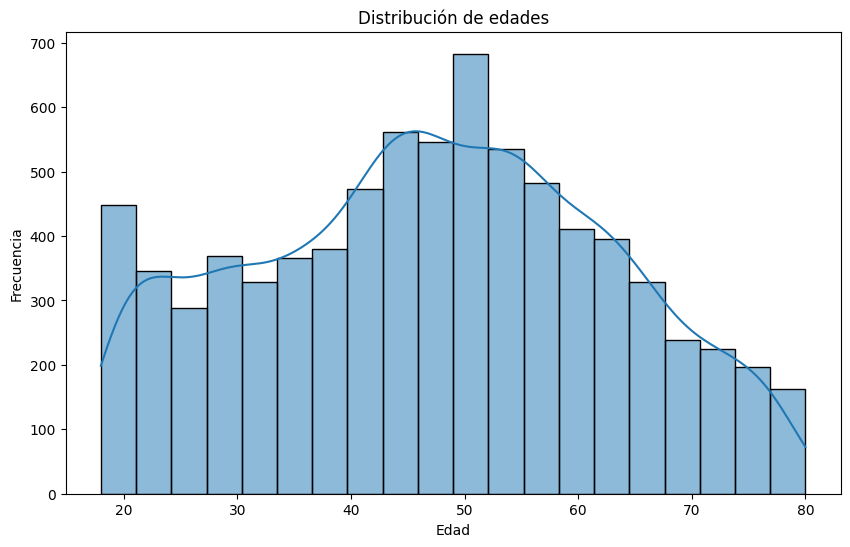

In [80]:
# histograma con la distribución de las edades (columna QD7)
plt.figure(figsize=(10, 6))
sns.histplot(data = data_2021, x="QD7", bins=20, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

##### Missing values

In [81]:
# Generando una tabla con la cantidad de valores missing para cada columna y su porcentje
missing_values = data_2021.isnull().sum()
missing_values_percent = 100 * data_2021.isnull().sum() / len(data_2021)
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
missing_values_table = missing_values_table.rename(columns={0: "Missing Values", 1: "%"})
missing_values_table = missing_values_table[missing_values_table.iloc[:, 1] != 0].sort_values("%", ascending=False).round(1)
print("Hay " + str(missing_values_table.shape[0]) + " columnas con valores faltantes")
missing_values_table


Hay 43 columnas con valores faltantes


,Missing Values,%
QF3_4,7764,100.0
QP7_2,7764,100.0
QP2_17,7764,100.0
QP3_4,7764,100.0
QP3_6,7764,100.0
QP3_8,7764,100.0
QP3_10,7764,100.0
QP3_14,7764,100.0
QP3_15,7764,100.0
QP3_17,7764,100.0


In [82]:
#eliminar todas las columnas con valores nulos ya que el 100% de los datos son nulos
data_2021 = data_2021.dropna(axis=1)
data_2021

,wght,QD1,QD2,QD3,QD4,QD5_1,QD5_2,QD5_3,QD5_4,QD5_5,...,QD11_5,QD11_6,QD11_7,QD11_8,QD11_9,QD11_10,QD11_99,QD12,QD13,QD7_a
ID,,,,,,,,,,,,,,,,,,,,,
1,2594.2485,0,8,if equal or above 15000,Spanish,0,0,0,1,0,...,0,0,0,0,0,0,0,1,15000 - 47000 €,50s
2,1825.7745,1,11,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,1,15000 - 47000 €,30s
3,3207.1128,1,14,if equal or above 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,0,Below 15000€,30s
4,3009.3894,0,8,if below 15000,Spanish,0,1,1,0,0,...,0,0,0,0,0,0,0,1,Above 47000 €,40s
5,5779.9355,1,9,if equal or above 15000,Spanish,0,1,0,1,0,...,0,0,0,0,0,0,0,0,15000 - 47000 €,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,4408.7930,1,4,if below 15000,Spanish,0,1,0,1,0,...,0,0,0,0,0,0,0,1,15000 - 47000 €,50s
7761,11130.0900,0,10,if equal or above 15000,Spanish,0,1,0,0,0,...,0,0,0,0,0,0,0,1,15000 - 47000 €,60s
7762,1201.2681,1,11,if equal or above 15000,Spanish,0,0,0,0,1,...,0,0,0,0,0,0,0,1,Do not know,30s


In [83]:
# mostrar columnas con valores missing
data_2021.columns[data_2021.isnull().sum() > 0]

Index([], dtype='object')

##### Columnas tipo object (encoding?)

In [84]:
# mostrar columnas con valores tipo object
data_2021.dtypes[data_2021.dtypes == "object"]

QD3      object
QD4      object
QP4      object
QD13     object
QD7_a    object
dtype: object

In [85]:
# mostrar valores de la columna QD3
data_2021["QD3"].value_counts()


QD3
if equal or above 15000    5361
if below 15000             2403
Name: count, dtype: int64

In [86]:
# label encoding para la columna QD3
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_2021['QD3_encoded'] = le.fit_transform(data_2021['QD3'])
data_2021['QD3_encoded'].value_counts()

QD3_encoded
1    5361
0    2403
Name: count, dtype: int64

In [87]:
print(data_2021[['QD3', 'QD3_encoded']].head())


                        QD3  QD3_encoded
ID                                      
1   if equal or above 15000            1
2            if below 15000            0
3   if equal or above 15000            1
4            if below 15000            0
5   if equal or above 15000            1


In [88]:
# mostrar valores columna QD4
print(data_2021["QD4"].value_counts())

QD4
Spanish    7764
Name: count, dtype: int64


In [89]:
# ELIMINAR COLUMNA QD4
data_2021 = data_2021.drop(columns="QD4")

In [90]:
# mostrar valores columna QD13
print(data_2021["QD13"].value_counts())

QD13
15000 - 47000 €              4060
Below 15000€                 1712
Above 47000 €                1510
Do not know                   240
Refuse to answer              222
Interviewer or CAPI error      20
Name: count, dtype: int64


In [91]:
data_encoded_2021 = pd.get_dummies(data_2021, columns=['QD13'], prefix='Income')
print(data_encoded_2021.head())


         wght  QD1  QD2                      QD3  QD5_1  QD5_2  QD5_3  QD5_4  \
ID                                                                             
1   2594.2485    0    8  if equal or above 15000      0      0      0      1   
2   1825.7745    1   11           if below 15000      0      1      1      0   
3   3207.1128    1   14  if equal or above 15000      0      1      1      0   
4   3009.3894    0    8           if below 15000      0      1      1      0   
5   5779.9355    1    9  if equal or above 15000      0      1      0      1   

    QD5_5  QD5_6  ...  QD11_99  QD12  QD7_a  QD3_encoded  \
ID                ...                                      
1       0      0  ...        0     1    50s            1   
2       0      0  ...        0     1    30s            0   
3       0      0  ...        0     0    30s            1   
4       0      0  ...        0     1    40s            0   
5       0      0  ...        0     0    40s            1   

    Income_15000 -

In [92]:
# Identificar las columnas generadas por pd.get_dummies()
dummy_columns = [col for col in data_encoded_2021 if col.startswith('Income')]

# Convertir sólo esas columnas a uint8 para que salgan como 0 y 1
for column in dummy_columns:
    data_encoded_2021[column] = data_encoded_2021[column].astype('uint8')

print(data_encoded_2021[dummy_columns].head())


    Income_15000 - 47000 €  Income_Above 47000 €  Income_Below 15000€  \
ID                                                                      
1                        1                     0                    0   
2                        1                     0                    0   
3                        0                     0                    1   
4                        0                     1                    0   
5                        1                     0                    0   

    Income_Do not know  Income_Interviewer or CAPI error  \
ID                                                         
1                    0                                 0   
2                    0                                 0   
3                    0                                 0   
4                    0                                 0   
5                    0                                 0   

    Income_Refuse to answer  
ID                           
1      

In [93]:
# mostrar valores columna QP4
print(data_encoded_2021["QP4"].value_counts())

QP4
-98                                5930
An unsecured bank loan              377
Insurance                           304
A credit card                       261
An investment account               236
Crypto-assets                       180
Stocks and shares                   164
A mortgage                          161
A savings account                    61
A pension or retirement product      48
0                                    27
Bonds                                 8
-97                                   4
-5                                    2
-99                                   1
Name: count, dtype: int64


In [94]:
# Convertir los códigos a strings para que representen categorías
def label_product(row):
    if row == '-99':
        return 'Refused_to_answer'
    elif row == '-97':
        return 'Dont_know'
    elif row == '0':
        return 'Not_voluntarily_chosen'
    elif row == '-98':
        return 'Not_applicable'
    elif row == '-5':
        return 'Error'
    else:
        return f'{row}'

data_encoded_2021['QP4'] = data_encoded_2021['QP4'].apply(label_product)
print(data_encoded_2021['QP4'].value_counts())

# Aplicar One-Hot Encoding
data_encoded_2021 = pd.get_dummies(data_encoded_2021, columns=['QP4'], prefix='Product')

# Verificamos el resultado
print(data_encoded_2021.filter(regex='Product_').head())


QP4
Not_applicable                     5930
An unsecured bank loan              377
Insurance                           304
A credit card                       261
An investment account               236
Crypto-assets                       180
Stocks and shares                   164
A mortgage                          161
A savings account                    61
A pension or retirement product      48
Not_voluntarily_chosen               27
Bonds                                 8
Dont_know                             4
Error                                 2
Refused_to_answer                     1
Name: count, dtype: int64
    Product_A credit card  Product_A mortgage  \
ID                                              
1                   False               False   
2                   False                True   
3                   False               False   
4                   False               False   
5                   False               False   

    Product_A pension or r

In [95]:
# Identificar las columnas generadas por pd.get_dummies()
dummy_columns = [col for col in data_encoded_2021 if col.startswith('Product')]


# Convertir sólo esas columnas a uint8 para que salgan como 0 y 1
for column in dummy_columns:
    data_encoded_2021[column] = data_encoded_2021[column].astype('uint8')

print(data_encoded_2021[dummy_columns].head())

    Product_A credit card  Product_A mortgage  \
ID                                              
1                       0                   0   
2                       0                   1   
3                       0                   0   
4                       0                   0   
5                       0                   0   

    Product_A pension or retirement product  Product_A savings account  \
ID                                                                       
1                                         0                          0   
2                                         0                          0   
3                                         0                          0   
4                                         0                          0   
5                                         0                          0   

    Product_An investment account  Product_An unsecured bank loan  \
ID                                                                  

In [96]:
#ver las ultimas 30 columnas y todas las filas
data_encoded_2021.iloc[:, -20:]


,Income_Above 47000 €,Income_Below 15000€,Income_Do not know,Income_Interviewer or CAPI error,Income_Refuse to answer,Product_A credit card,Product_A mortgage,Product_A pension or retirement product,Product_A savings account,Product_An investment account,Product_An unsecured bank loan,Product_Bonds,Product_Crypto-assets,Product_Dont_know,Product_Error,Product_Insurance,Product_Not_applicable,Product_Not_voluntarily_chosen,Product_Refused_to_answer,Product_Stocks and shares
ID,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7762,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##### deteccion de outliers

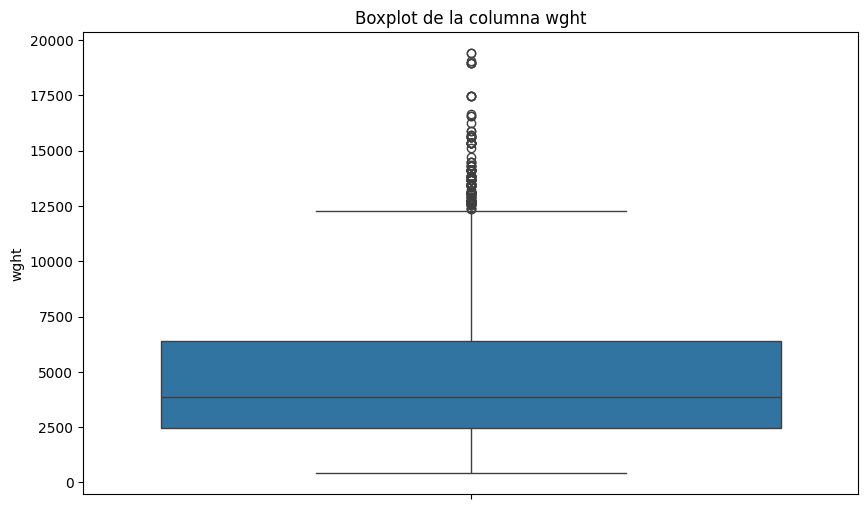

Número de outliers detectados: 140
Límite inferior para outliers: -3486.41215
Límite superior para outliers: 12335.376250000001


In [97]:
#deteccion de outliers en todas las columnas 
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico boxplot para la columna 'wght'
plt.figure(figsize=(10, 6))
sns.boxplot(data_encoded_2021['wght'])
plt.title('Boxplot de la columna wght')
plt.show()

# Calculando el IQR para la columna 'wght'
Q1 = data_encoded_2021['wght'].quantile(0.25)
Q3 = data_encoded_2021['wght'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = data_encoded_2021[(data_encoded_2021['wght'] < lower_bound) | (data_encoded_2021['wght'] > upper_bound)]
print('Número de outliers detectados:', len(outliers))
print('Límite inferior para outliers:', lower_bound)
print('Límite superior para outliers:', upper_bound)



##### Correlación entre variables de interes 


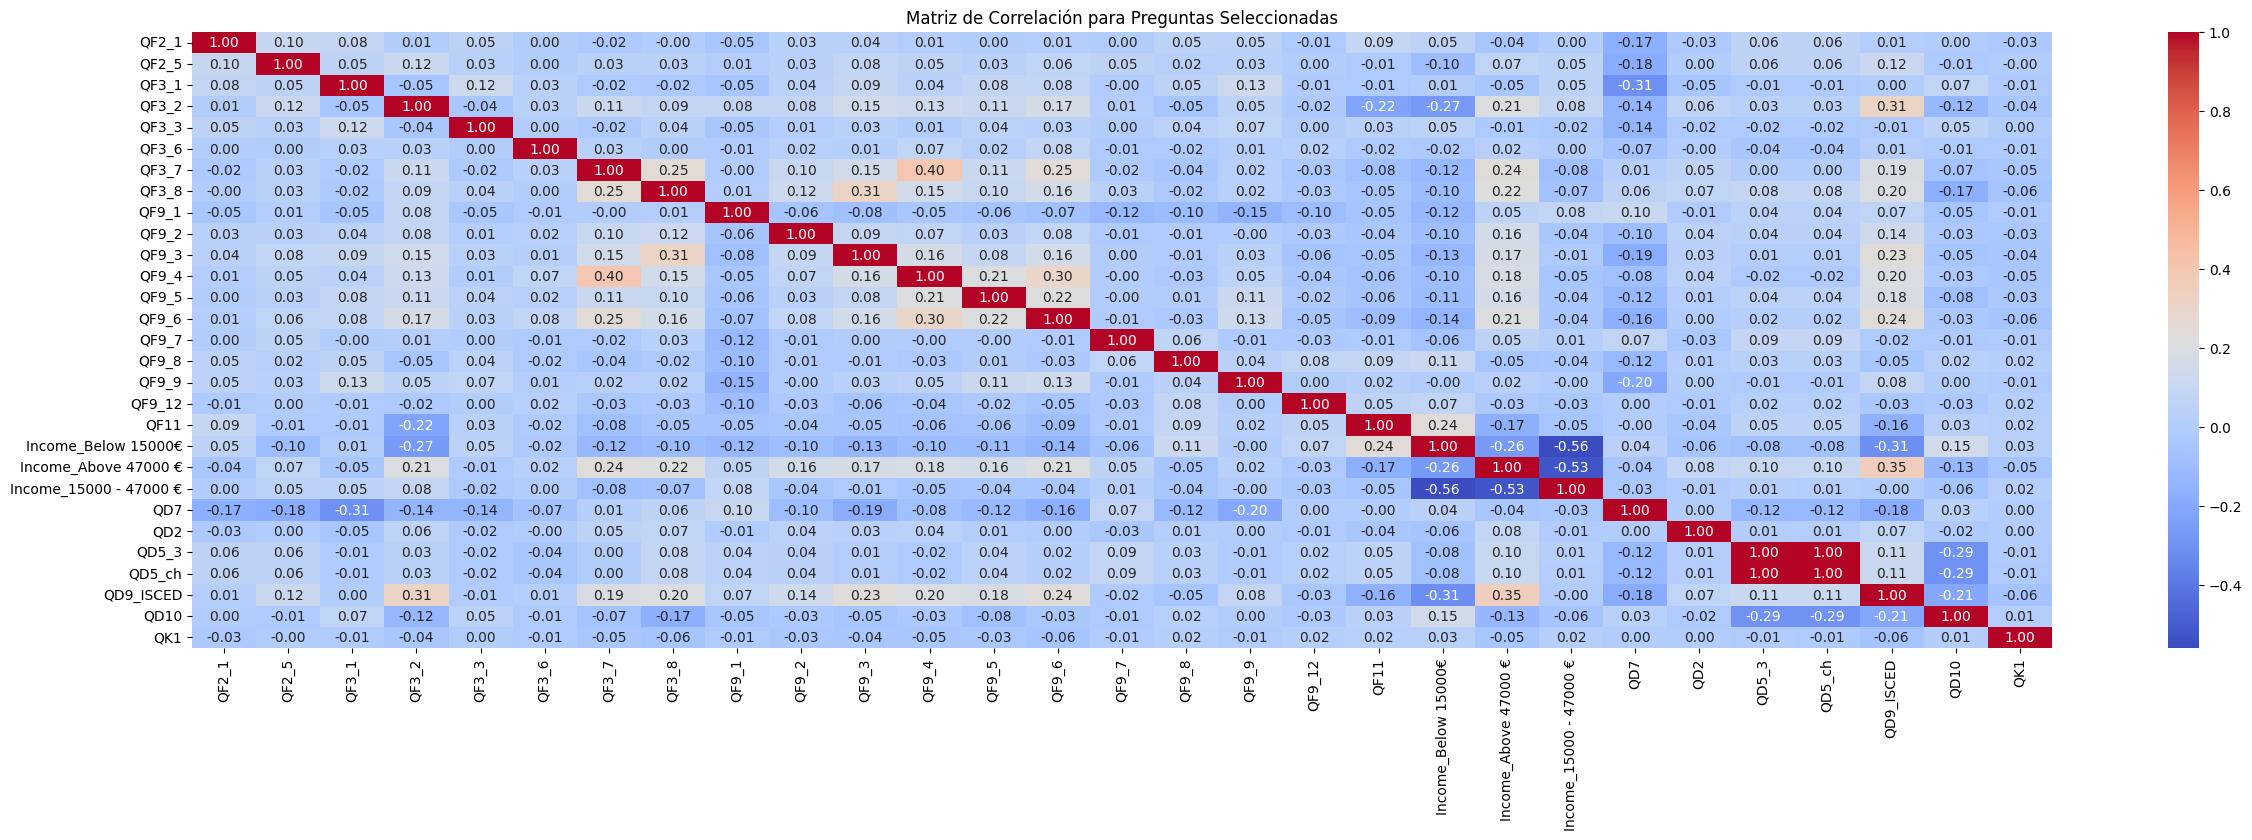

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

binary_columns = [  'QF2_1',  'QF2_5', 'QF3_1',	'QF3_2', 'QF3_3', 'QF3_6',	'QF3_7', 'QF3_8', 
                  'QF9_1', 'QF9_2', 'QF9_3', 'QF9_4', 'QF9_5', 'QF9_6', 'QF9_7', 'QF9_8', 'QF9_9', 'QF9_12', 'QF11', 'Income_Below 15000€', 'Income_Above 47000 €', 'Income_15000 - 47000 €'] 
continuous_columns = ['QD7',  'QD2', 'QD5_3', 'QD5_ch', 'QD9_ISCED', 'QD10', 'QK1'] 
# Lista de preguntas de interés


# Filtrar las columnas binarias para incluir solo 0 y 1
filtered_data = data_encoded_2021[binary_columns].apply(lambda x: x.isin([0, 1]))

# Crea un DataFrame que incluya solo las filas válidas para las columnas binarias
cleaned_binary_data = data_encoded_2021.loc[filtered_data.all(axis=1), binary_columns]

# Combina los datos binarios filtrados con los datos continuos
combined_data = pd.concat([cleaned_binary_data, data_encoded_2021[continuous_columns]], axis=1)

# Calcula la matriz de correlación
correlation_matrix = combined_data.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Preguntas Seleccionadas')
plt.show()




In [99]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado data
# Asegúrate de que QD7 y QD9_ISCED están en formato numérico adecuado
data_encoded_2021['QD7'] = pd.to_numeric(data_encoded_2021['QD7'], errors='coerce')  # Convierte a numérico, maneja los errores
data_encoded_2021['QD9_ISCED'] = pd.to_numeric(data_encoded_2021['QD9_ISCED'], errors='coerce')  # Convierte a numérico, maneja los errores

# Calcula la correlación de Pearson
correlation = data_encoded_2021['QD7'].corr(data_encoded_2021['QD9_ISCED'])

print(f"La correlación entre QD7 (Edad) y QD9_ISCED (Nivel de Educación ISCED) es: {correlation}")


La correlación entre QD7 (Edad) y QD9_ISCED (Nivel de Educación ISCED) es: -0.1828594443351182


##### BARPLOTS VARIABLES

/tmp/ipykernel_2649/2424484983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_encoded_2021, x='QD9_ISCED', palette= 'viridis')


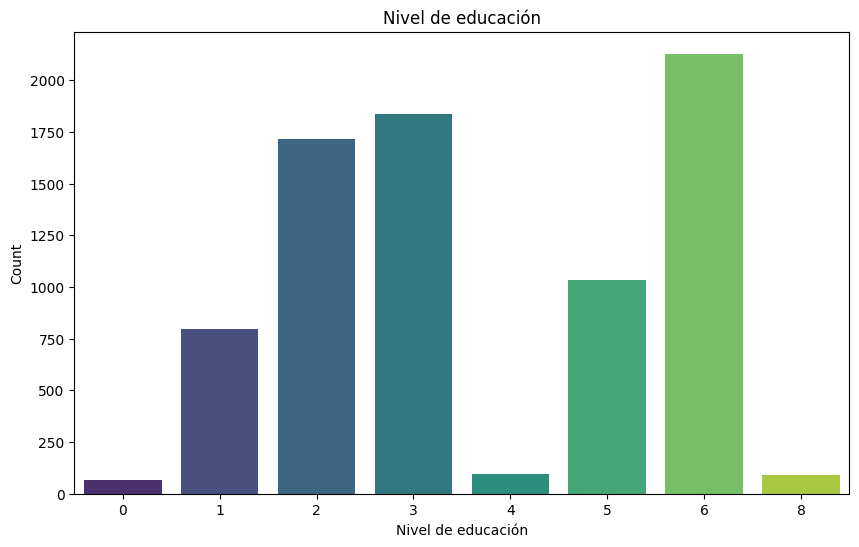

In [100]:
#BARPLOT QD9_ISCED EN COLORES
plt.figure(figsize=(10, 6))
sns.countplot(data = data_encoded_2021, x='QD9_ISCED', palette= 'viridis')
plt.title('Nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Count')
plt.show()

0: 'Early childhood education',  
    1: 'Primary education',   
    2: 'Lower secondary education',   
    3: 'Upper secondary education',   
    4: 'Post-secondary non-tertiary education',   
    5: 'Short-cycle tertiary education',   
    6: 'Bachelor’s or equivalent level',   
    7: 'Master’s or equivalent level',   
    8: 'Doctoral or equivalent level'  

/tmp/ipykernel_2649/1692575795.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_EDUCATION_LEVEL, palette= 'viridis')


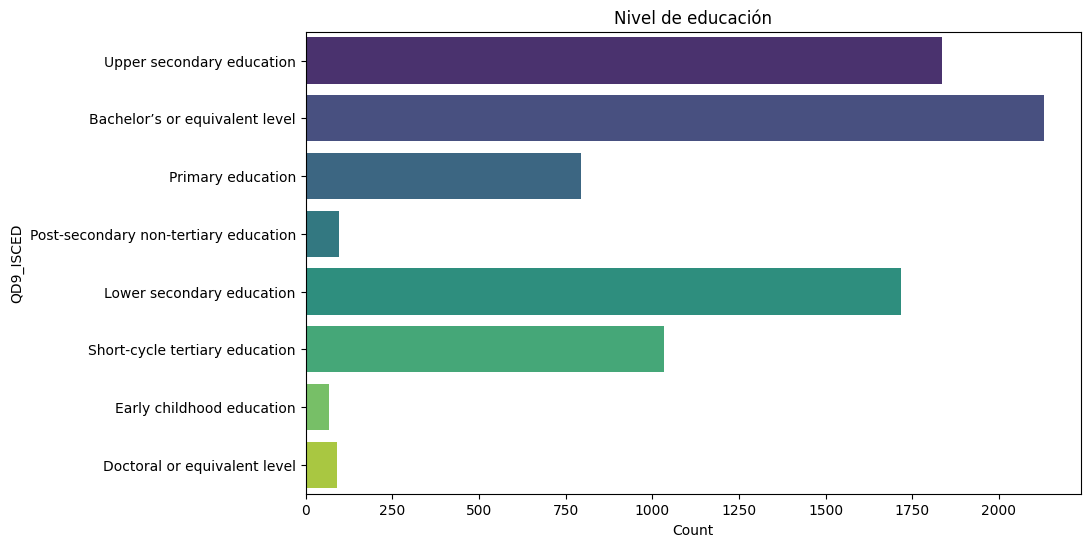

In [101]:
#BARPLOT QD9_ISCED EN COLORES 
data_EDUCATION_LEVEL = data_encoded_2021['QD9_ISCED'].replace({
    0: 'Early childhood education', 
    1: 'Primary education', 
    2: 'Lower secondary education', 
    3: 'Upper secondary education', 
    4: 'Post-secondary non-tertiary education', 
    5: 'Short-cycle tertiary education', 
    6: 'Bachelor’s or equivalent level', 
    7: 'Master’s or equivalent level', 
    8: 'Doctoral or equivalent level'
})
#BARPLOT DATA_EDUCATION_LEVEL EN COLORES
plt.figure(figsize=(10, 6))
sns.countplot(data = data_EDUCATION_LEVEL, palette= 'viridis')
plt.title('Nivel de educación')
plt.xlabel('Count')
plt.show()



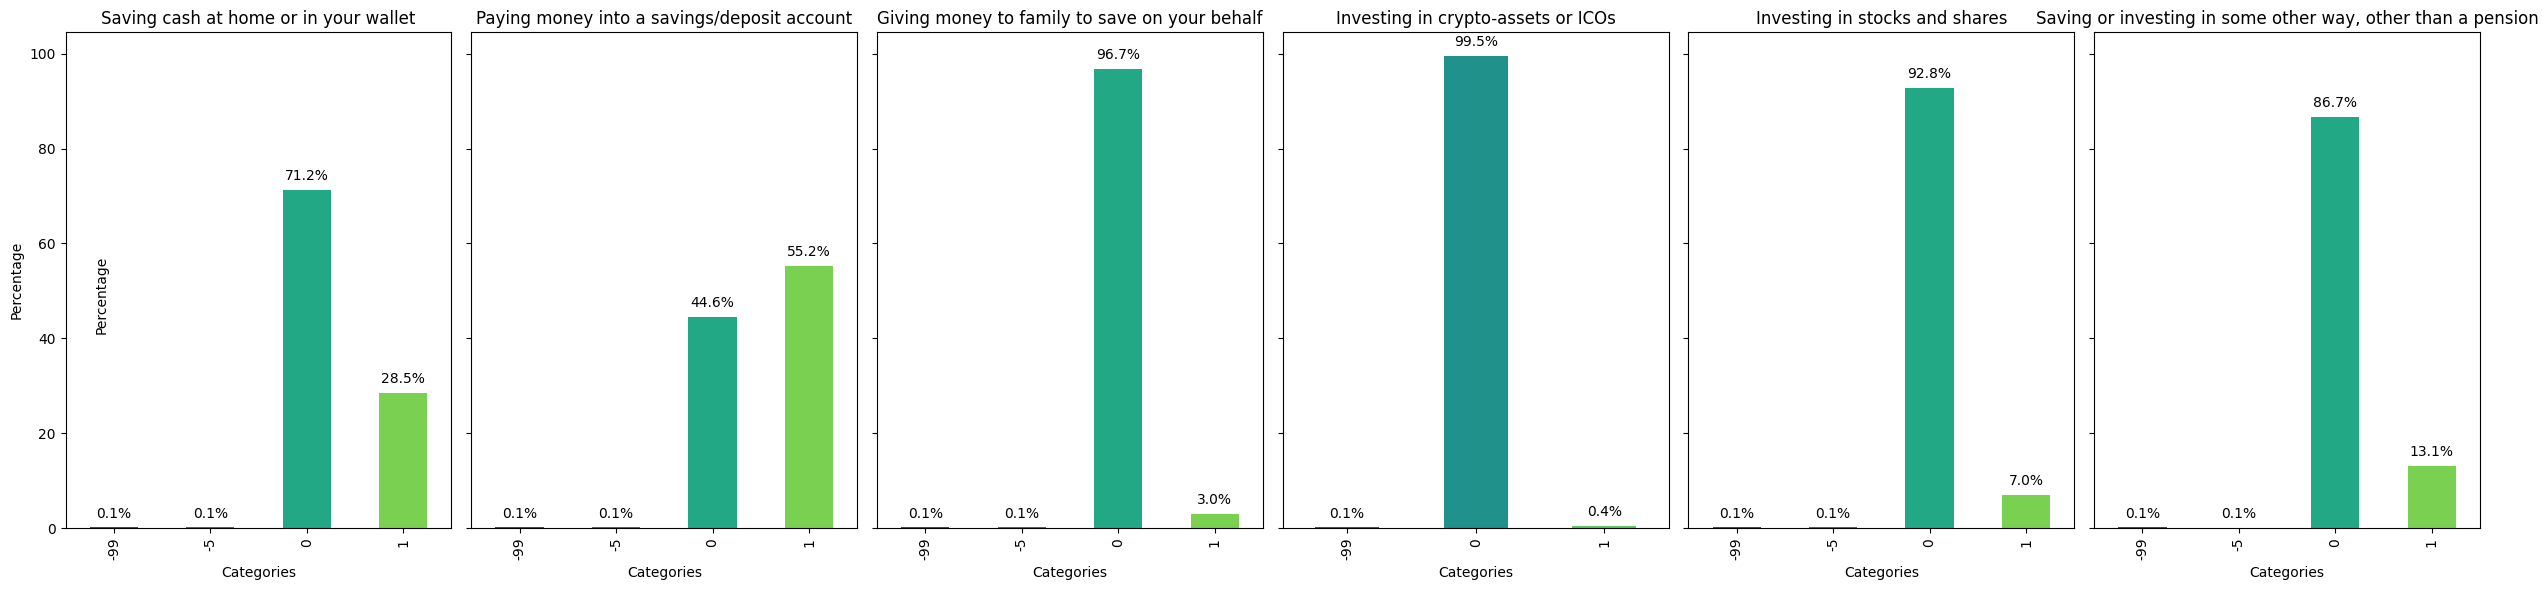

In [102]:
questions = ['QF3_1', 'QF3_2', 'QF3_3', 'QF3_6', 'QF3_7', 'QF3_8']
titulos = ['Saving cash at home or in your wallet',
    'Paying money into a savings/deposit account',
    'Giving money to family to save on your behalf',
    'Investing in crypto-assets or ICOs',
    'Investing in stocks and shares',
    'Saving or investing in some other way, other than a pension']

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(1, len(questions), figsize=(25, 6), sharey=True)

for i, question in enumerate(questions):
    # Calculate the percentage of each category within the question
    percent_data = data_encoded_2021[question].value_counts(normalize=True).sort_index() * 100
    # Create a bar plot for each category's percentage
    percent_data.plot(kind='bar', ax=axs[i], color=sns.color_palette('viridis', len(percent_data)))
    axs[i].set_title(titulos[i])
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Percentage')
    # Annotate the percentage on the bars
    for p in axs[i].patches:
        axs[i].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set a common y-label
fig.text(0.04, 0.5, 'Percentage', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


Ante la pregunta: **In the past 12 months have you been [personally] saving money in any of the following ways, whether or not you still have the money?** solo el 7% dijo que si a haber invertido en acciones. el 28,5% dijo que guardaba dinero en cash y el 55% dijo que si a pagar dinero a una cuenta de ahorro 

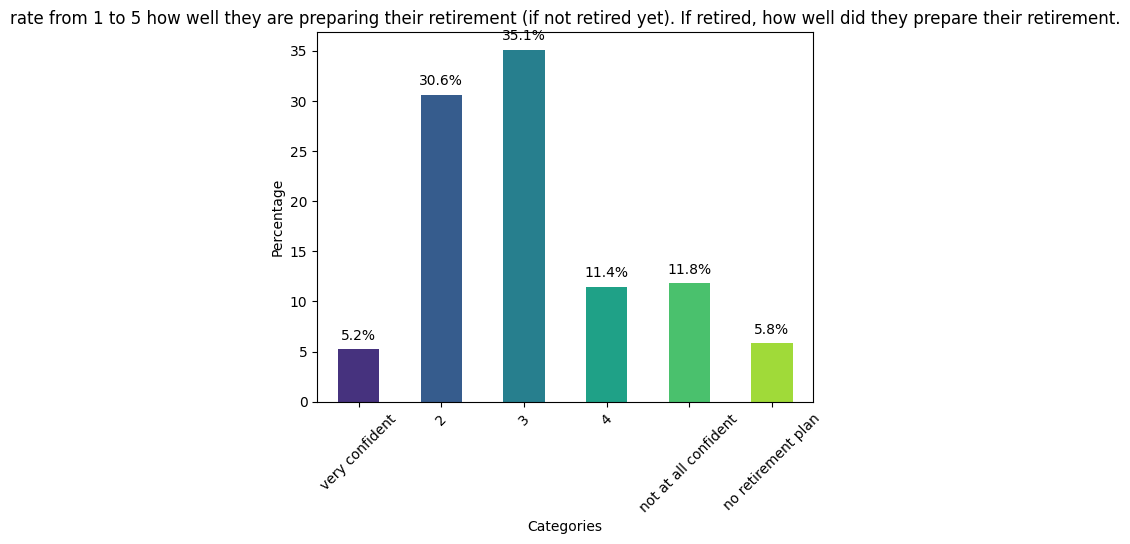

In [103]:
## barplot de la variable QF8 (sin valores -99, -97 y-5) EN PORCENTAJES
data_retirement = data_encoded_2021[data_encoded_2021['QF8'].isin([1, 2, 3, 4, 5, 6])]
percent_data = data_retirement['QF8'].value_counts(normalize=True).sort_index() * 100
percent_data.plot(kind='bar', color=sns.color_palette('viridis', len(percent_data)))
plt.title('rate from 1 to 5 how well they are preparing their retirement (if not retired yet). If retired, how well did they prepare their retirement.')
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2, 3, 4, 5],['very confident', '2', '3', '4', 'not at all confident', 'no retirement plan'], rotation = 45)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()



/tmp/ipykernel_2649/150885677.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=display_percentages.index, y=display_percentages.values, ax=axs[i], palette='viridis')
/tmp/ipykernel_2649/150885677.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=display_percentages.index, y=display_percentages.values, ax=axs[i], palette='viridis')
/tmp/ipykernel_2649/150885677.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=display_percentages.index, y=display_percentages.values, ax=axs[i], palette='viridis')
/tmp/ipykernel_2649/150885677.p

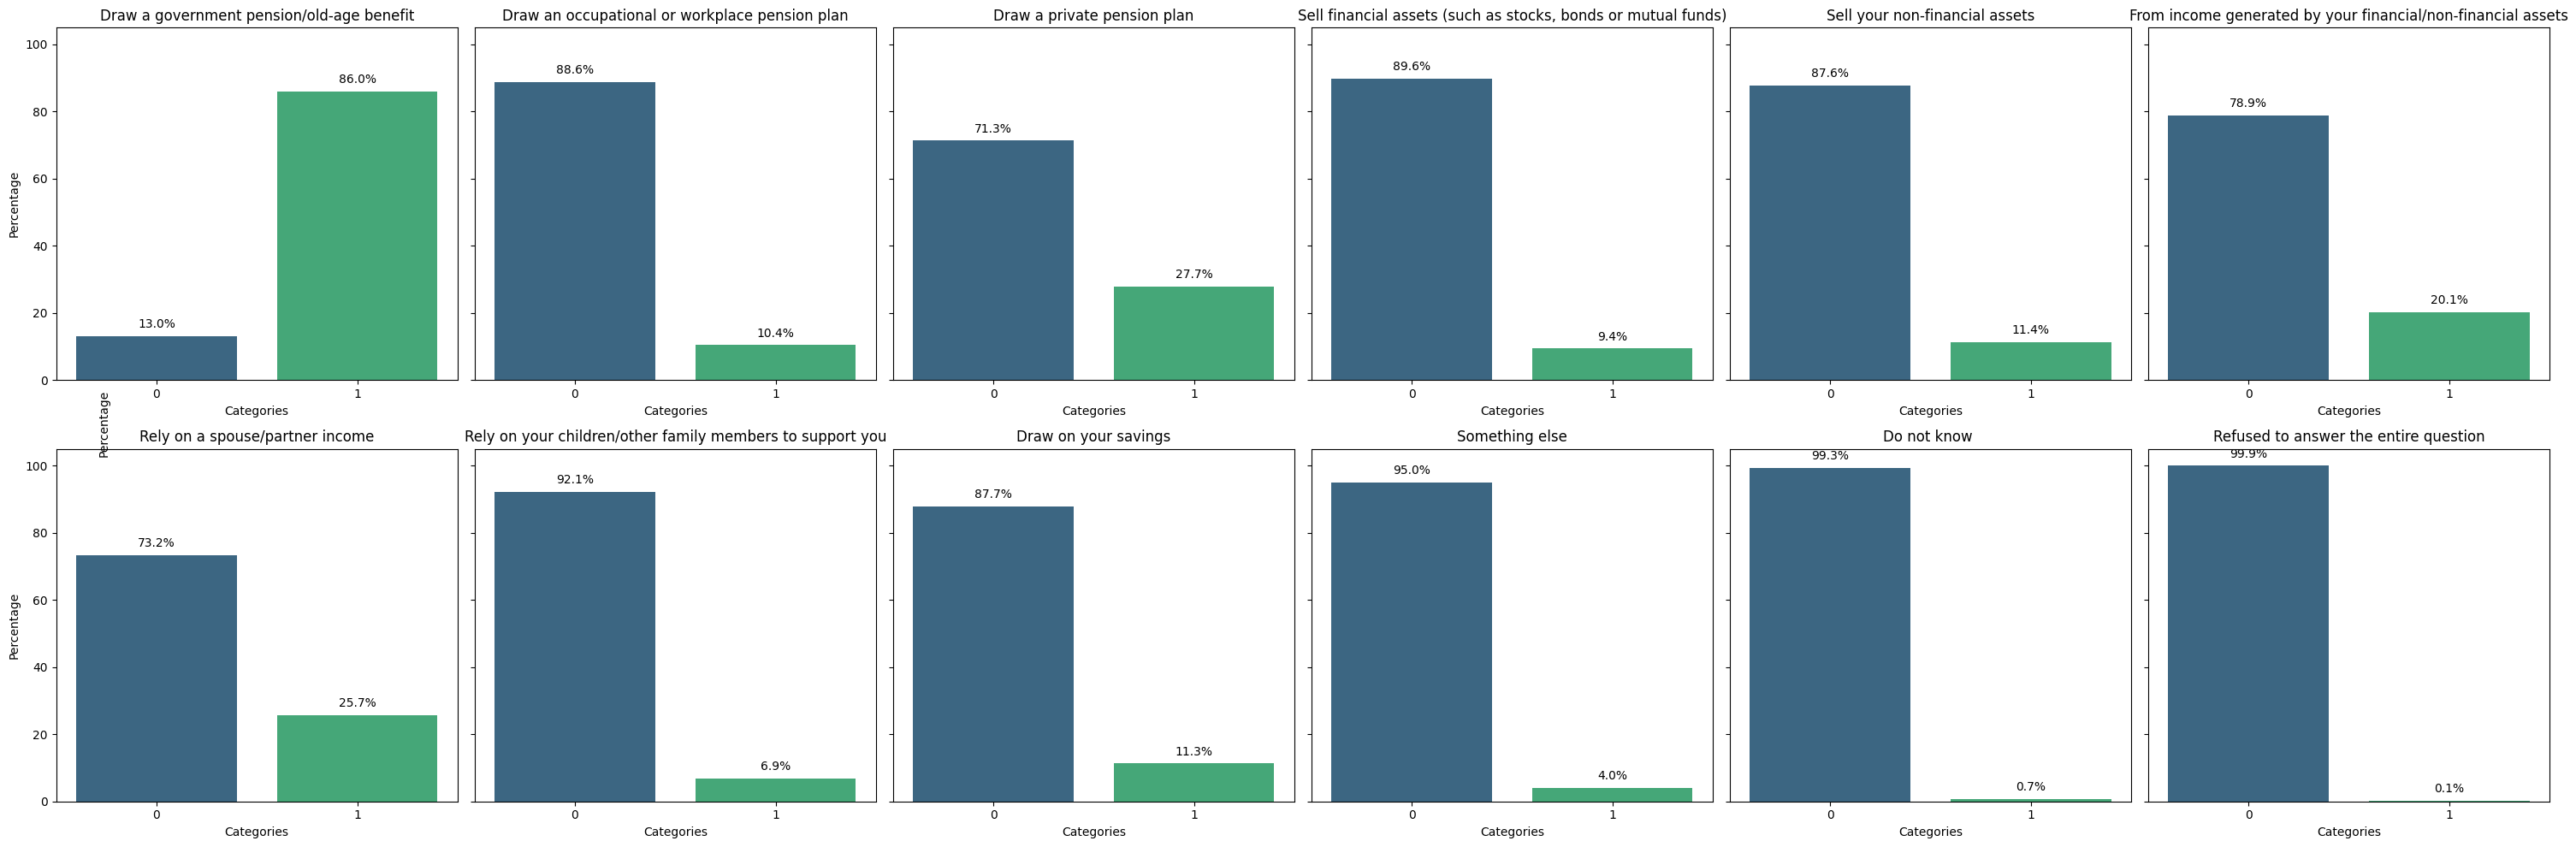

In [104]:
questions = ['QF9_1', 'QF9_2', 'QF9_3', 'QF9_4', 'QF9_5', 'QF9_6', 'QF9_7', 'QF9_8', 'QF9_9', 'QF9_12', 'QF9_97', 'QF9_99']
titles_qf9 = [
    'Draw a government pension/old-age benefit',
    'Draw an occupational or workplace pension plan',
    'Draw a private pension plan',
    'Sell financial assets (such as stocks, bonds or mutual funds)',
    'Sell your non-financial assets',
    'From income generated by your financial/non-financial assets',
    'Rely on a spouse/partner income',
    'Rely on your children/other family members to support you',
    'Draw on your savings',
    'Something else',
    'Do not know ',
    'Refused to answer the entire question'
]

# Configura la figura de matplotlib y los ejes
fig, axs = plt.subplots(2, len(questions)//2 + len(questions)%2, figsize=(30, 10), sharey=True)
axs = axs.flatten()  # Aplana el array para facilitar la iteración

for i, question in enumerate(questions):
    # Calcula el porcentaje de cada categoría basado en el total de respuestas
    total_responses = len(data_encoded_2021[question])
    value_counts = data_encoded_2021[question].value_counts().sort_index()
    percentages = (value_counts / total_responses) * 100
    
    # Selecciona solo los porcentajes para 0 y 1 para visualizar en el gráfico
    display_percentages = percentages.loc[[0, 1]]
    
    # Crea un gráfico de barras para las categorías 0 y 1
    sns.barplot(x=display_percentages.index, y=display_percentages.values, ax=axs[i], palette='viridis')
    axs[i].set_title(titles_qf9[i])
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Percentage')
    
    # Anota los porcentajes reales en las barras
    for index in display_percentages.index:
        height = display_percentages[index]
        axs[i].annotate(f'{height:.1f}%', (index, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Establece una etiqueta común para el eje Y
fig.text(0.04, 0.5, 'Percentage', va='center', rotation='vertical')

# Elimina los subgráficos vacíos si el número de preguntas no llena exactamente la cuadrícula de subgráficos
for ax in axs[len(questions):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


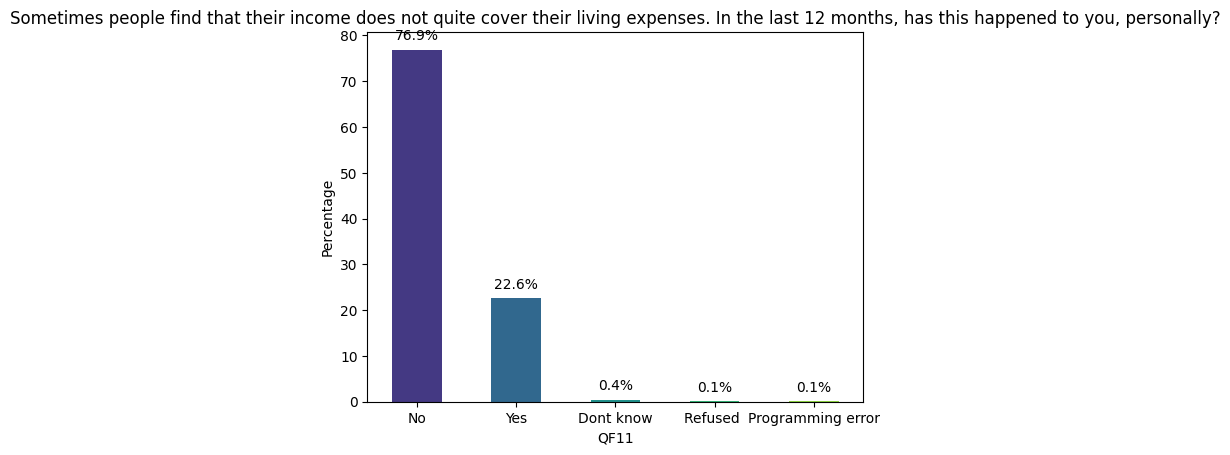

In [105]:
# BARPLOT variable QF11 (cambia -99 por "Refused to answer", -98 por "Not applicable", -97 por "Dont know", 0 por "No", 1 por "Yes")
data_income_expenses = data_encoded_2021['QF11'].replace({
    -99: 'Refused ',
    -5: 'Programming error',
    -97: 'Dont know',
    0: 'No',
    1: 'Yes'
})
percent_data = data_income_expenses.value_counts(normalize=True) * 100
percent_data.plot(kind='bar', color=sns.color_palette('viridis', len(percent_data)))
plt.title('Sometimes people find that their income does not quite cover their living expenses. In the last 12 months, has this happened to you, personally?')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


**El 22.6%** de los encuestados cree que su income no cubre todos sus living expenses

QF11
1    1752
Name: count, dtype: int64


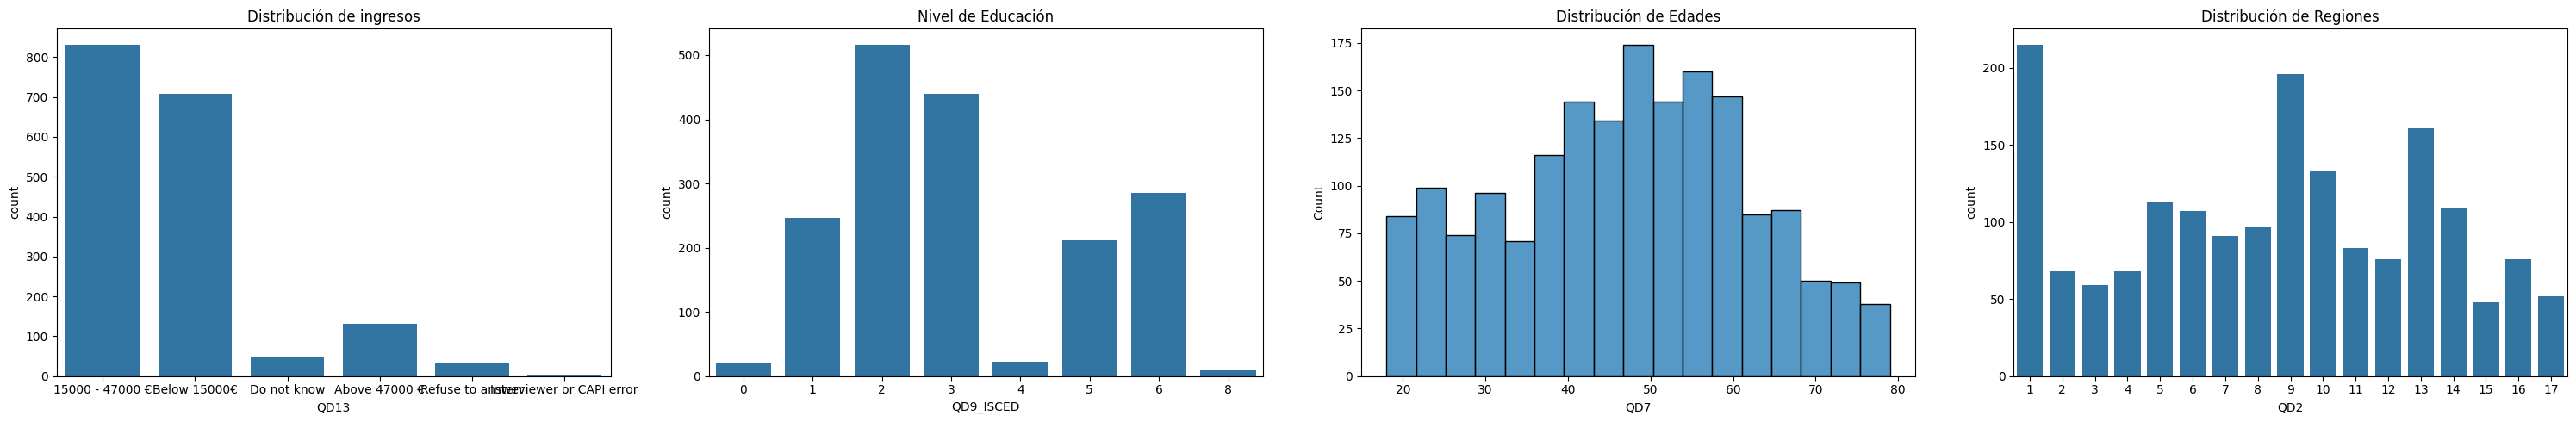

In [106]:
# filtra por los que respondieron 1 a QF11
expenses_higher_income = data_2021[data_2021['QF11'] == 1]
print(expenses_higher_income['QF11'].value_counts())

# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.countplot(x= 'QD13', data=expenses_higher_income, ax=axes[0])
sns.countplot(x= 'QD9_ISCED', data=expenses_higher_income, ax=axes[1])
sns.histplot(x= 'QD7', data=expenses_higher_income, ax=axes[2])
sns.countplot(x= 'QD2', data=expenses_higher_income, ax=axes[3])
axes[0].set_title('Distribución de ingresos')
axes[1].set_title('Nivel de Educación')
axes[2].set_title('Distribución de Edades')
axes[3].set_title('Distribución de Regiones')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2649/1584208492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='QD2', data=data_2021, palette='viridis')


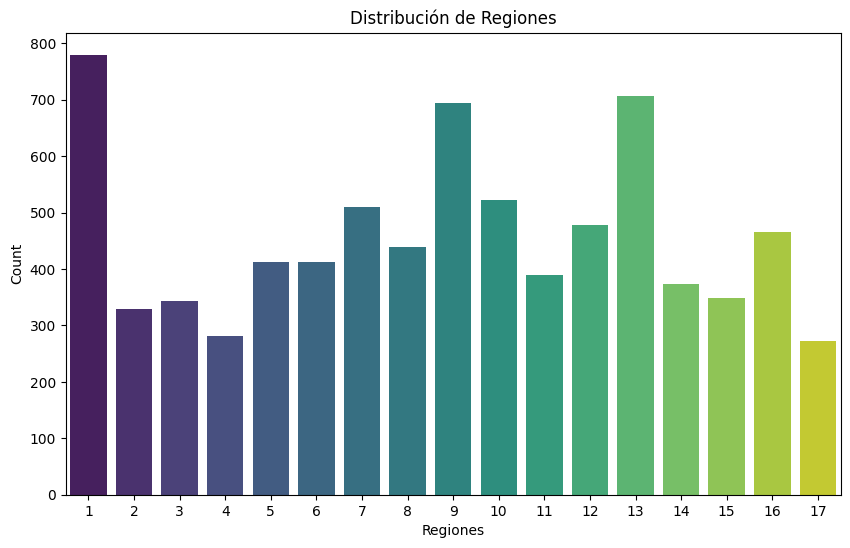

In [107]:
# COuntplot de qd2
plt.figure(figsize=(10, 6))
sns.countplot(x='QD2', data=data_2021, palette='viridis')
plt.title('Distribución de Regiones')
plt.xlabel('Regiones')
plt.ylabel('Count')
plt.show()


In [108]:
data_2021['QD13'].value_counts()

QD13
15000 - 47000 €              4060
Below 15000€                 1712
Above 47000 €                1510
Do not know                   240
Refuse to answer              222
Interviewer or CAPI error      20
Name: count, dtype: int64

In [109]:
# ver ultimas 40 columnas de data_encoded_2021
data_encoded_2021.iloc[:, -25:]

,QD11_99,QD12,QD7_a,QD3_encoded,Income_15000 - 47000 €,Income_Above 47000 €,Income_Below 15000€,Income_Do not know,Income_Interviewer or CAPI error,Income_Refuse to answer,...,Product_An unsecured bank loan,Product_Bonds,Product_Crypto-assets,Product_Dont_know,Product_Error,Product_Insurance,Product_Not_applicable,Product_Not_voluntarily_chosen,Product_Refused_to_answer,Product_Stocks and shares
ID,,,,,,,,,,,,,,,,,,,,,
1,0,1,50s,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,30s,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,30s,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,40s,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,40s,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,0,1,50s,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7761,0,1,60s,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7762,0,1,30s,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [110]:
# 1

# Calcula el total de respuestas y las respuestas "Sí" por región
total_por_region = data_2021['QD2'].value_counts()
si_por_region = data_2021[data_2021['QF11'] == 1]['QD2'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada región
proporcion_si_por_region = (si_por_region / total_por_region) * 100

# 2

# Calcula el total de respuestas y las respuestas "Sí" por nivel de educación
total_por_educacion = data_2021['QD9_ISCED'].value_counts()
si_por_educacion = data_2021[data_2021['QF11'] == 1]['QD9_ISCED'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada nivel de educación
proporcion_si_por_educacion = (si_por_educacion / total_por_educacion) * 100

# 3

# Calcula el total de respuestas y las respuestas "Sí" por nivel de ingresos
total_por_ingresos = data_2021['QD13'].value_counts()
si_por_ingresos = data_2021[data_2021['QF11'] == 1]['QD13'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada nivel de ingresos
proporcion_si_por_ingresos = (si_por_ingresos / total_por_ingresos) * 100


In [111]:
# Calcula el total de respuestas y las respuestas "Sí" por municipality size (QD3)
total_por_municipio = data_2021['QD3'].value_counts()
si_por_municipio = data_2021[data_2021['QF11'] == 1]['QD3'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada tamaño de municipio
proporcion_si_por_municipio = (si_por_municipio / total_por_municipio) * 100


/tmp/ipykernel_2649/1998170681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_si_por_region.index, y=proporcion_si_por_region, ax=axes[0], palette= 'muted')
/tmp/ipykernel_2649/1998170681.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Valencia', 'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'], rotation=60)
/tmp/ipykernel_2649/1998170681.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_

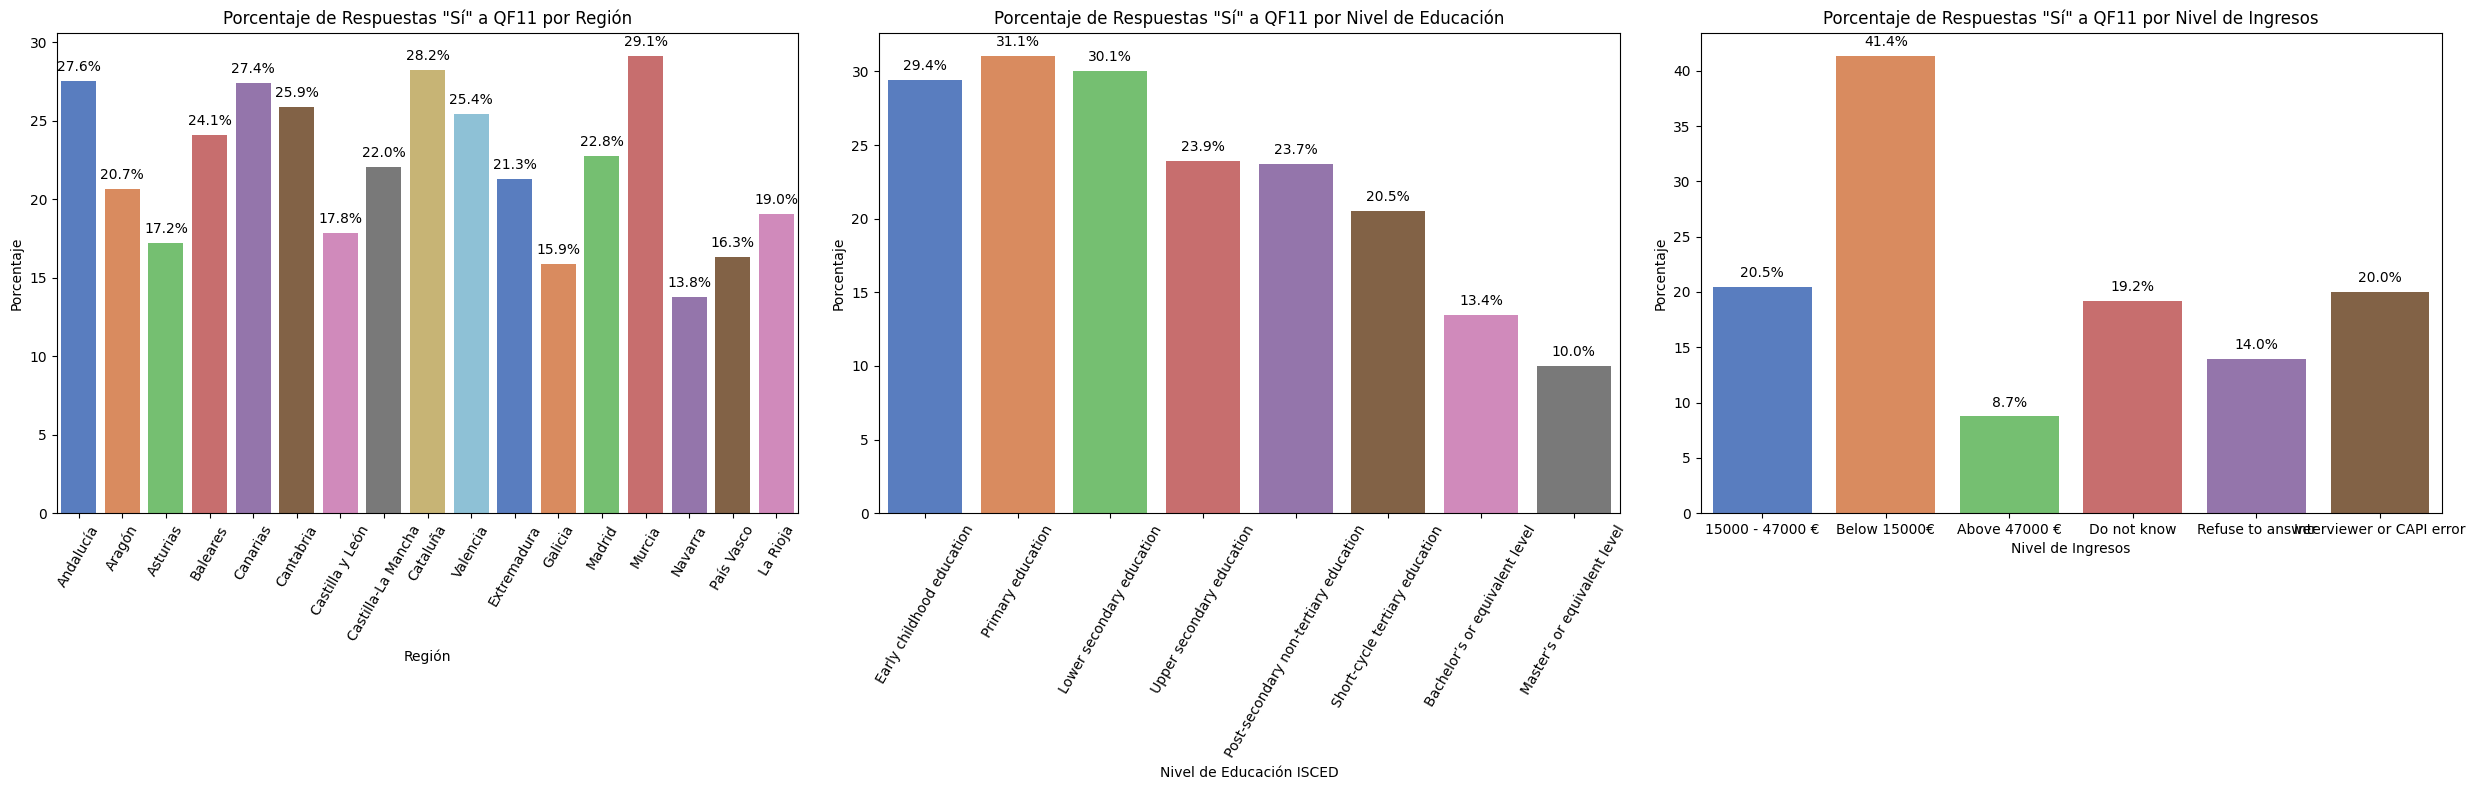

In [112]:
# Configura la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))  # Ajusta el tamaño según sea necesario

# Gráfico 1: Porcentaje de Respuestas "Sí" a QF11 por Región
sns.barplot(x=proporcion_si_por_region.index, y=proporcion_si_por_region, ax=axes[0], palette= 'muted')
axes[0].set_title('Porcentaje de Respuestas "Sí" a QF11 por Región')
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Porcentaje')
axes[0].set_xticklabels(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Valencia', 'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'], rotation=60)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico 2: Porcentaje de Respuestas "Sí" a QF11 por Nivel de Educación
sns.barplot(x=proporcion_si_por_educacion.index, y=proporcion_si_por_educacion, ax=axes[1], palette= 'muted')
axes[1].set_title('Porcentaje de Respuestas "Sí" a QF11 por Nivel de Educación')
axes[1].set_xlabel('Nivel de Educación ISCED')
axes[1].set_ylabel('Porcentaje')
axes[1].set_xticklabels(['Early childhood education', 'Primary education', 'Lower secondary education', 'Upper secondary education', 'Post-secondary non-tertiary education', 'Short-cycle tertiary education', 'Bachelor’s or equivalent level', 'Master’s or equivalent level', 'Doctoral or equivalent level'], rotation=60)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico 3: Porcentaje de Respuestas "Sí" a QF11 por Nivel de Ingresos
sns.barplot(x=proporcion_si_por_ingresos.index, y=proporcion_si_por_ingresos, ax=axes[2], palette= 'muted')
axes[2].set_title('Porcentaje de Respuestas "Sí" a QF11 por Nivel de Ingresos')
axes[2].set_xlabel('Nivel de Ingresos')
axes[2].set_ylabel('Porcentaje')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout() 
plt.show()


In [113]:
data_2021[data_2021['QP4'] != '-98'].value_counts('QP4',normalize = True) *100

QP4
An unsecured bank loan             20.556161
Insurance                          16.575791
A credit card                      14.231189
An investment account              12.868048
Crypto-assets                       9.814613
Stocks and shares                   8.942203
A mortgage                          8.778626
A savings account                   3.326063
A pension or retirement product     2.617230
0                                   1.472192
Bonds                               0.436205
-97                                 0.218103
-5                                  0.109051
-99                                 0.054526
Name: proportion, dtype: float64

/tmp/ipykernel_2649/2697532845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barplot_qp4.index, y=barplot_qp4, palette= 'viridis')


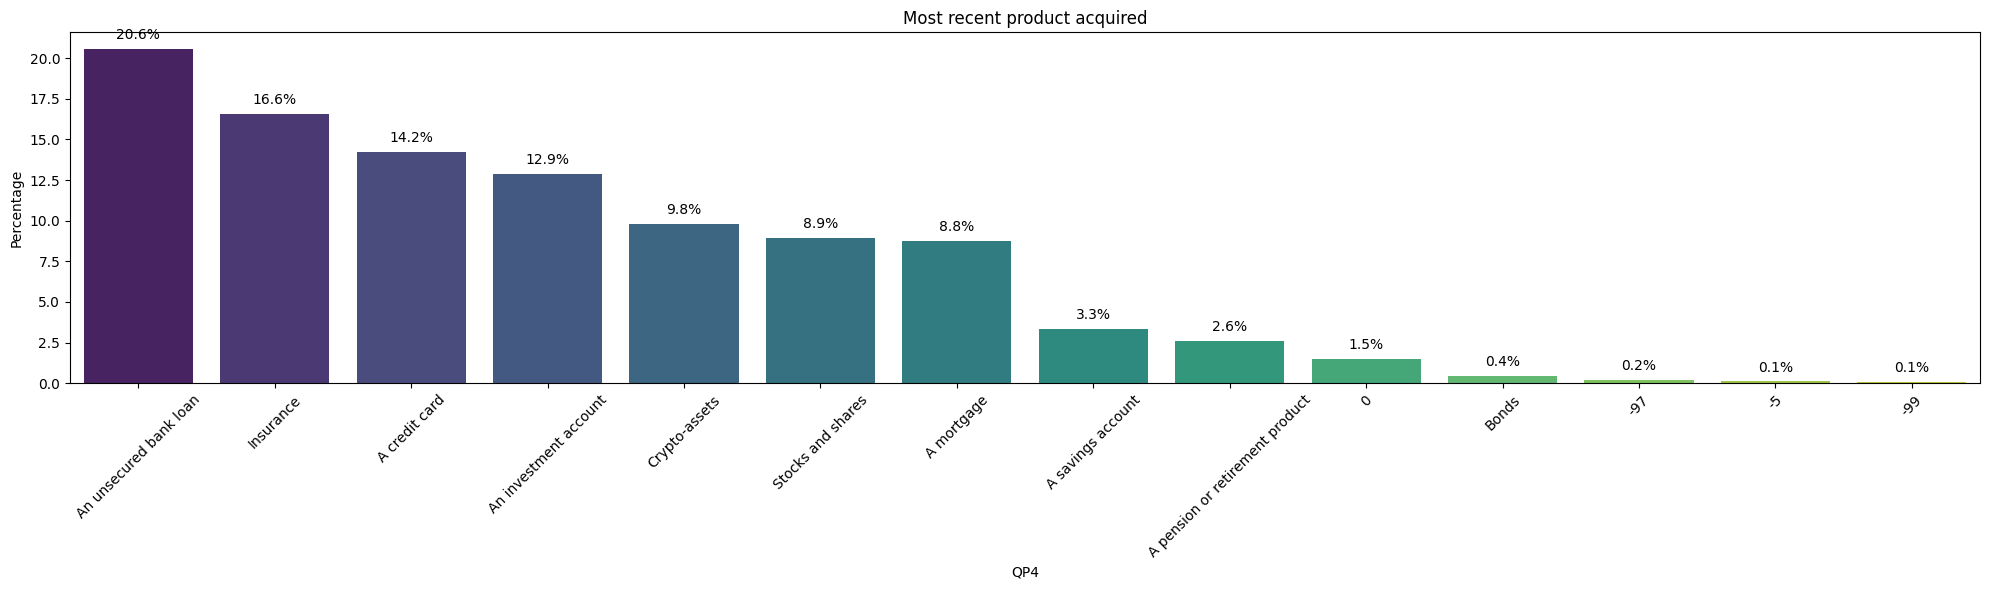

In [114]:
#filtrar valores QP4. todos menos -98
barplot_qp4 = data_2021[data_2021['QP4'] != '-98'].value_counts('QP4',normalize = True) *100

# VISUALIZAR EN UN BARPLOT
plt.figure(figsize=(20, 6))
sns.barplot(x=barplot_qp4.index, y=barplot_qp4, palette= 'viridis')
plt.title('Most recent product acquired')
plt.xlabel('QP4')
plt.ylabel('Percentage')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [115]:
data_encoded_2021['QP5'].value_counts()

QP5
-98    4226
 1     1360
 3     1080
 2      908
 4      140
-97      30
-5       14
-99       6
Name: count, dtype: int64

QS1_8
1    1387
Name: count, dtype: int64


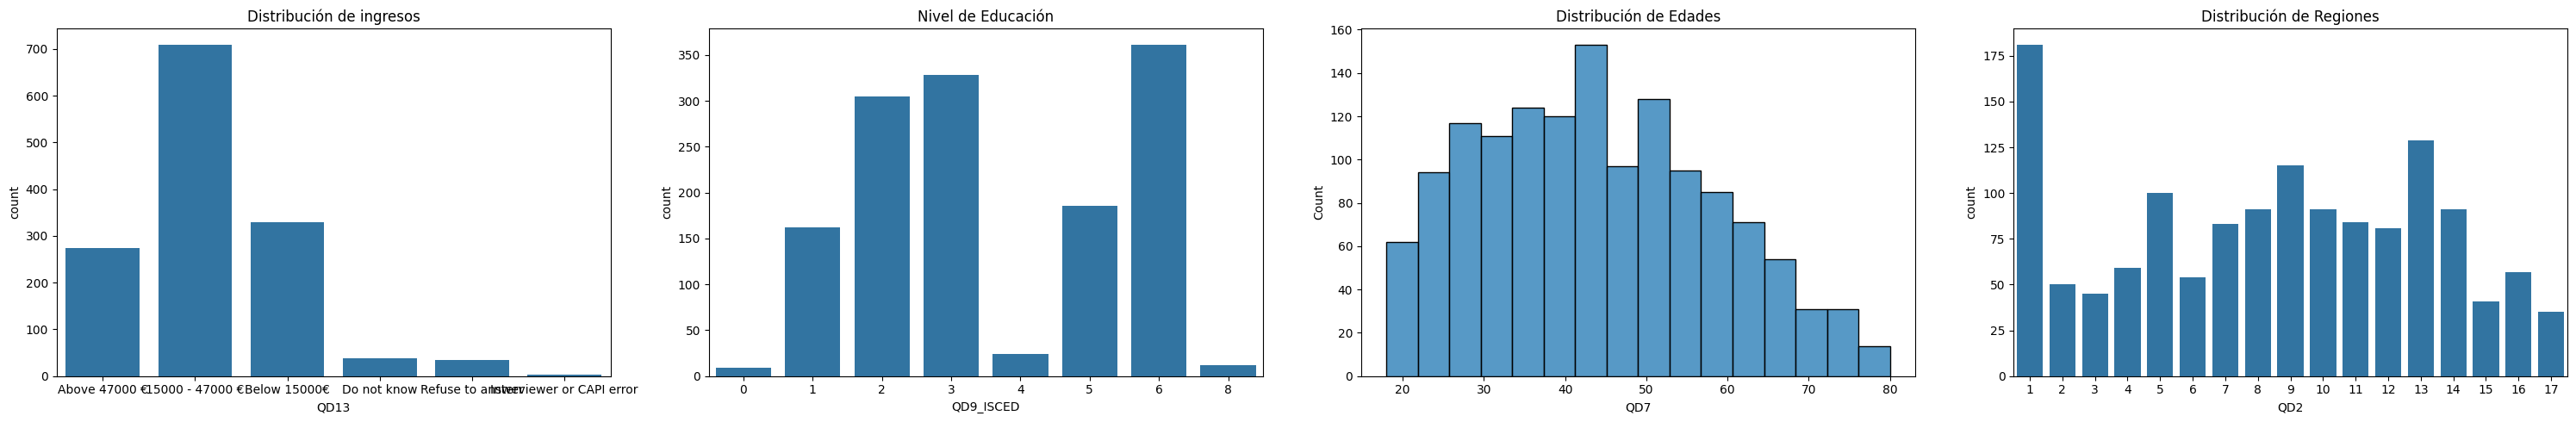

In [116]:
# filtra por los que respondieron 1 a Qs1_8
expenses_higher_income = data_2021[data_2021['QS1_8'] == 1]
print(expenses_higher_income['QS1_8'].value_counts())

# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.countplot(x= 'QD13', data=expenses_higher_income, ax=axes[0])
sns.countplot(x= 'QD9_ISCED', data=expenses_higher_income, ax=axes[1])
sns.histplot(x= 'QD7', data=expenses_higher_income, ax=axes[2])
sns.countplot(x= 'QD2', data=expenses_higher_income, ax=axes[3])
axes[0].set_title('Distribución de ingresos')
axes[1].set_title('Nivel de Educación')
axes[2].set_title('Distribución de Edades')
axes[3].set_title('Distribución de Regiones')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2649/4014492808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='QS1_4', data=data_2021, palette='viridis')


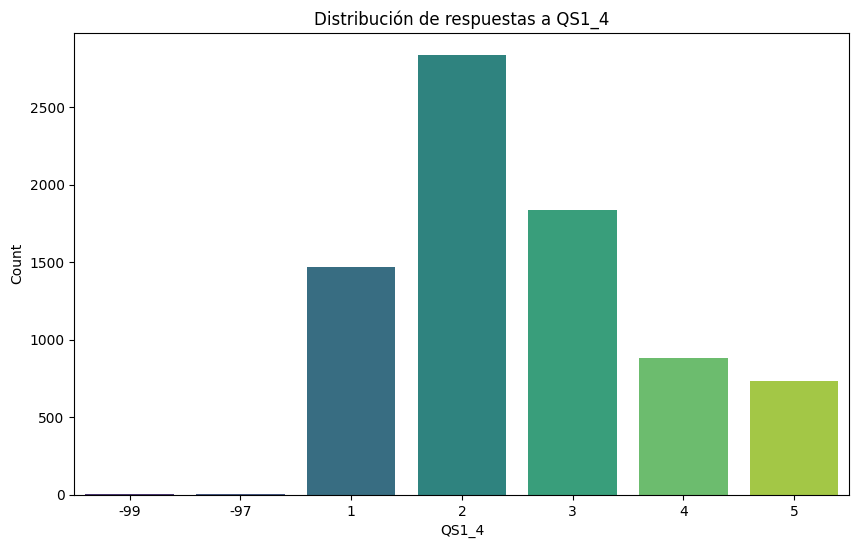

In [117]:
# distribucion respuestas pregunta QS1_4
plt.figure(figsize=(10, 6))
sns.countplot(x='QS1_4', data=data_2021, palette='viridis')
plt.title('Distribución de respuestas a QS1_4')
plt.xlabel('QS1_4')
plt.ylabel('Count')
plt.show()


QS2_5
1    6663
Name: count, dtype: int64


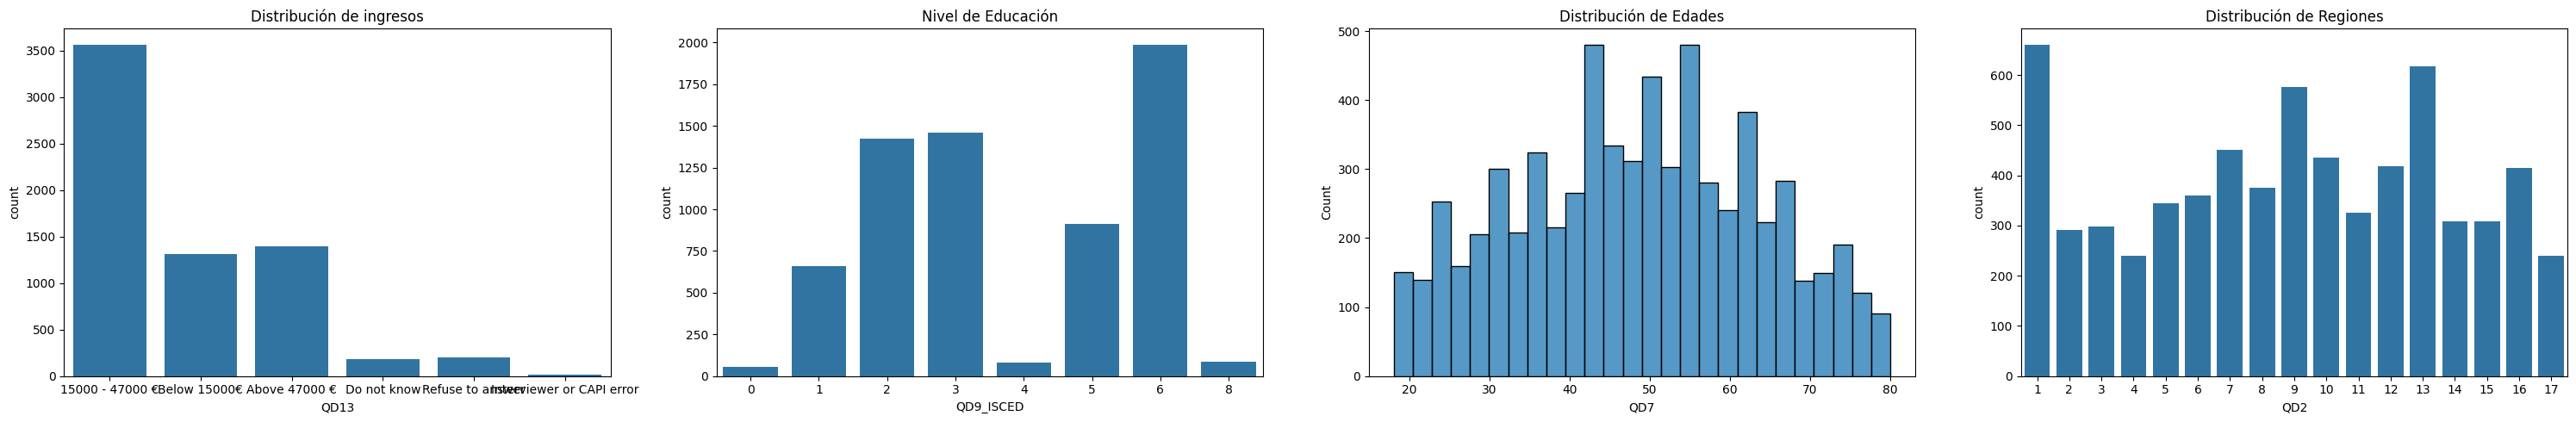

In [118]:
# filtra por los que respondieron 1 a Qs1_8
expenses_higher_income = data_2021[data_2021['QS2_5'] == 1]
print(expenses_higher_income['QS2_5'].value_counts())

# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.countplot(x= 'QD13', data=expenses_higher_income, ax=axes[0])
sns.countplot(x= 'QD9_ISCED', data=expenses_higher_income, ax=axes[1])
sns.histplot(x= 'QD7', data=expenses_higher_income, ax=axes[2])
sns.countplot(x= 'QD2', data=expenses_higher_income, ax=axes[3])
axes[0].set_title('Distribución de ingresos')
axes[1].set_title('Nivel de Educación')
axes[2].set_title('Distribución de Edades')
axes[3].set_title('Distribución de Regiones')
plt.tight_layout()
plt.show()

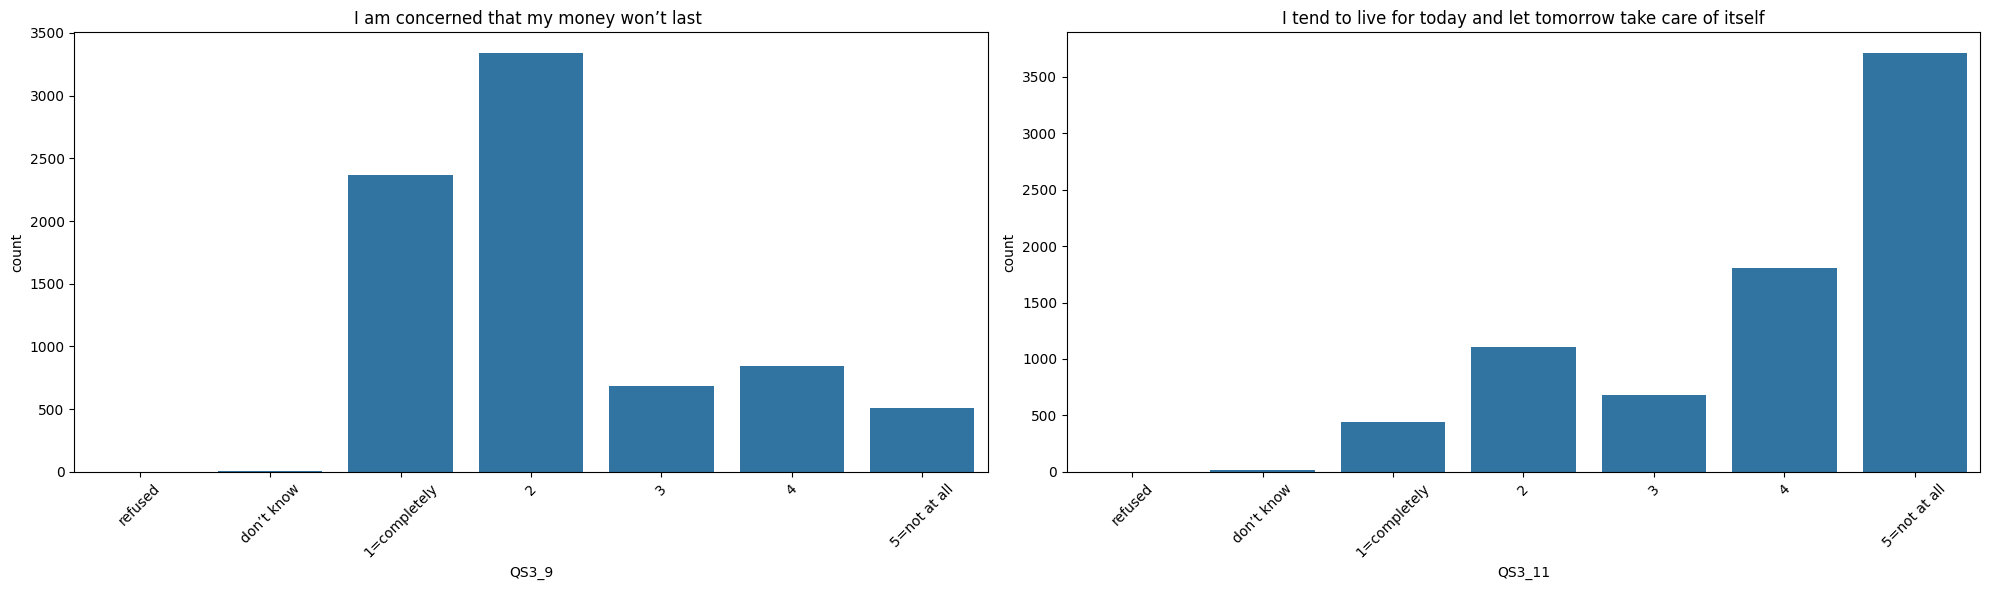

In [119]:
# distribucion respuestas pregunta QS3_9
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(x= 'QS3_9', data=data_2021, ax=axes[0])
sns.countplot(x= 'QS3_11', data=data_2021, ax=axes[1])
axes[0].set_title('I am concerned that my money won’t last ')
axes[1].set_title('I tend to live for today and let tomorrow take care of itself')
axes[0].set_xticks([0, 1, 2, 3, 4, 5, 6],['refused', 'don’t know', '1=completely', '2', '3', '4', '5=not at all'], rotation = 45)
axes[1].set_xticks([0, 1, 2, 3, 4, 5, 6],['refused', 'don’t know', '1=completely', '2', '3', '4', '5=not at all'], rotation = 45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2649/3033627799.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a.index, y=a, palette= 'viridis')


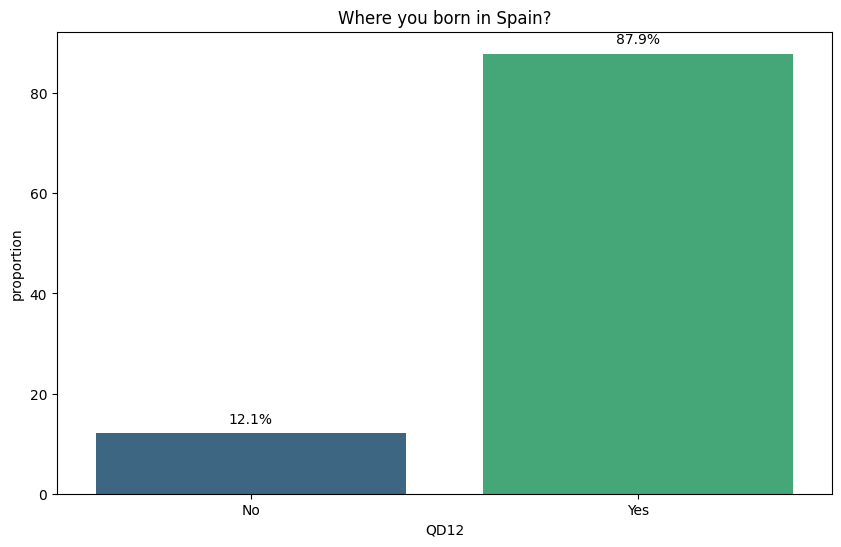

In [120]:
#PORCENTAJES QD12 BARPLOT 
a = data_encoded_2021['QD12'].value_counts(normalize= True) *100 
plt.figure(figsize=(10, 6))
sns.barplot(x=a.index, y=a, palette= 'viridis')
plt.title('Where you born in Spain?')
plt.xticks([0,1],['No', 'Yes'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

###### financial knowledge (QK)


/tmp/ipykernel_2649/3491748961.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qk1.index, y=qk1, palette= 'viridis')


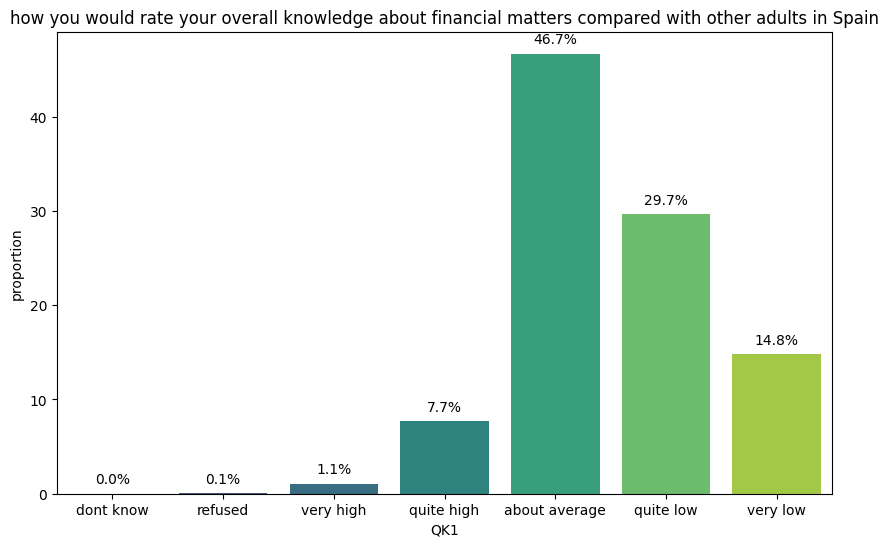

In [121]:
# distribucion respuestas pregunta QK1
qk1 = data_encoded_2021['QK1'].value_counts(normalize= True) *100 
plt.figure(figsize=(10, 6))
sns.barplot(x=qk1.index, y=qk1, palette= 'viridis')
plt.title('how you would rate your overall knowledge about financial matters compared with other adults in Spain')
plt.xticks([0,1,2,3,4,5,6],['dont know', 'refused', 'very high', 'quite high', 'about average', 'quite low', 'very low'])
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

QK1
2    598
Name: count, dtype: int64


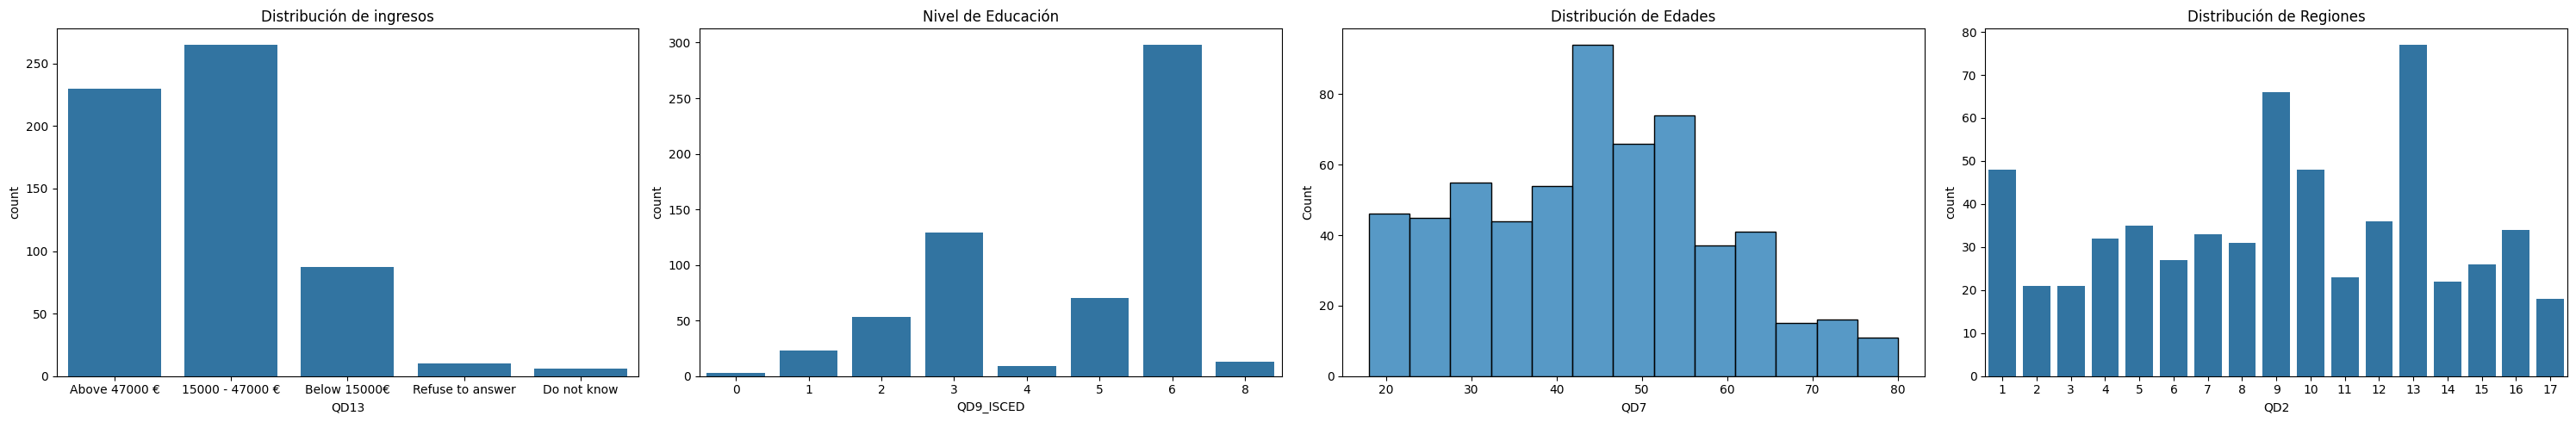

In [122]:
# filtra por los que respondieron 1 a Qs1_8
expenses_higher_income = data_2021[data_2021['QK1'] == 2]
print(expenses_higher_income['QK1'].value_counts())

# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.countplot(x= 'QD13', data=expenses_higher_income, ax=axes[0])
sns.countplot(x= 'QD9_ISCED', data=expenses_higher_income, ax=axes[1])
sns.histplot(x= 'QD7', data=expenses_higher_income, ax=axes[2])
sns.countplot(x= 'QD2', data=expenses_higher_income, ax=axes[3])
axes[0].set_title('Distribución de ingresos')
axes[1].set_title('Nivel de Educación')
axes[2].set_title('Distribución de Edades')
axes[3].set_title('Distribución de Regiones')
plt.tight_layout()
plt.show()

In [123]:
# 1

# Calcula el total de respuestas y las respuestas "Sí" por región
total_por_region = data_2021['QD2'].value_counts()
si_por_region = data_2021[data_2021['QK1'] == 5]['QD2'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada región
proporcion_si_por_region = (si_por_region / total_por_region) * 100

# 2

# Calcula el total de respuestas y las respuestas "Sí" por nivel de educación
total_por_educacion = data_2021['QD9_ISCED'].value_counts()
si_por_educacion = data_2021[data_2021['QK1'] == 5]['QD9_ISCED'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada nivel de educación
proporcion_si_por_educacion = (si_por_educacion / total_por_educacion) * 100

# 3

# Calcula el total de respuestas y las respuestas "Sí" por nivel de ingresos
total_por_ingresos = data_2021['QD13'].value_counts()
si_por_ingresos = data_2021[data_2021['QK1'] == 5]['QD13'].value_counts()

# Calcula la proporción de respuestas "Sí" en cada nivel de ingresos
proporcion_si_por_ingresos = (si_por_ingresos / total_por_ingresos) * 100

/tmp/ipykernel_2649/4269437081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_si_por_region.index, y=proporcion_si_por_region, ax=axes[0], palette= 'muted')
/tmp/ipykernel_2649/4269437081.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Valencia', 'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'], rotation=60)
/tmp/ipykernel_2649/4269437081.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_

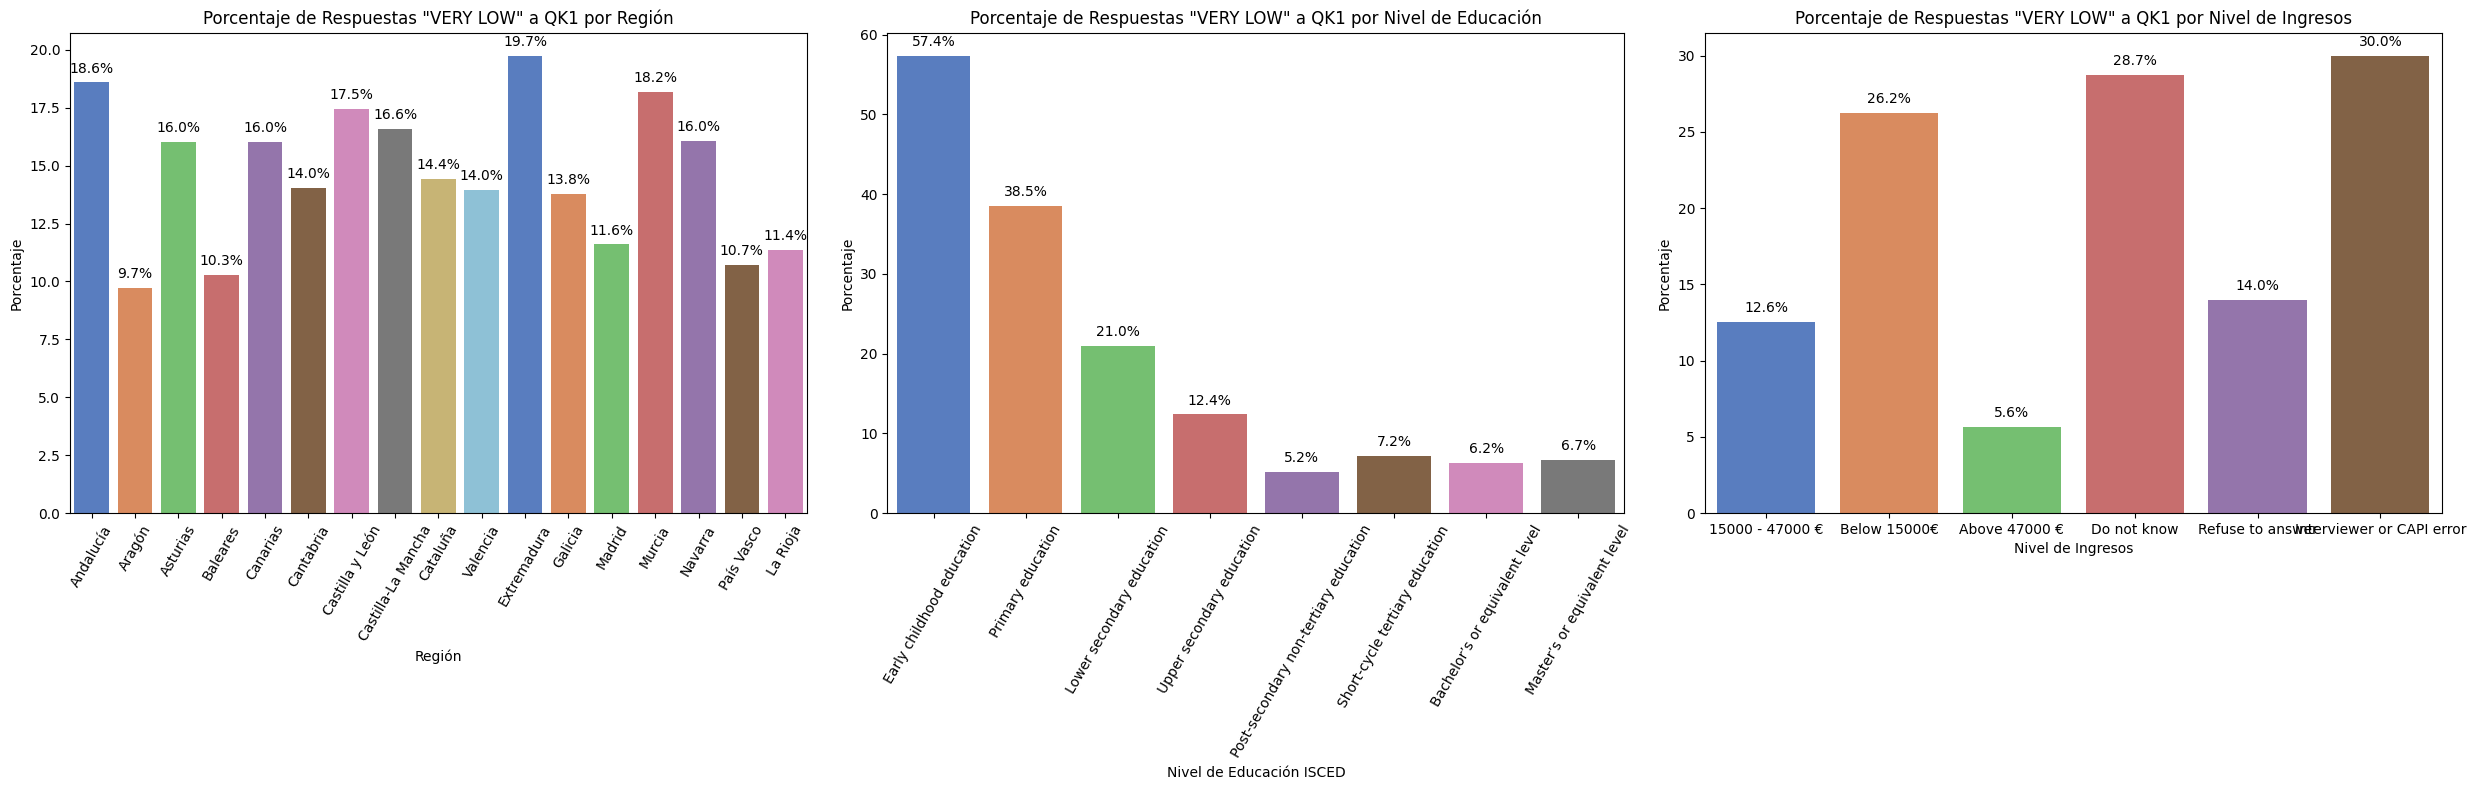

In [124]:
# Configura la figura y los ejes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))  # Ajusta el tamaño según sea necesario

# Gráfico 1: Porcentaje de Respuestas "Sí" a QK1 por Región
sns.barplot(x=proporcion_si_por_region.index, y=proporcion_si_por_region, ax=axes[0], palette= 'muted')
axes[0].set_title('Porcentaje de Respuestas "VERY LOW" a QK1 por Región')
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Porcentaje')
axes[0].set_xticklabels(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Valencia', 'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'], rotation=60)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico 2: Porcentaje de Respuestas "Sí" a QF11 por Nivel de Educación
sns.barplot(x=proporcion_si_por_educacion.index, y=proporcion_si_por_educacion, ax=axes[1], palette= 'muted')
axes[1].set_title('Porcentaje de Respuestas "VERY LOW" a QK1 por Nivel de Educación')
axes[1].set_xlabel('Nivel de Educación ISCED')
axes[1].set_ylabel('Porcentaje')
axes[1].set_xticklabels(['Early childhood education', 'Primary education', 'Lower secondary education', 'Upper secondary education', 'Post-secondary non-tertiary education', 'Short-cycle tertiary education', 'Bachelor’s or equivalent level', 'Master’s or equivalent level', 'Doctoral or equivalent level'], rotation=60)
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico 3: Porcentaje de Respuestas "Sí" a QF11 por Nivel de Ingresos
sns.barplot(x=proporcion_si_por_ingresos.index, y=proporcion_si_por_ingresos, ax=axes[2], palette= 'muted')
axes[2].set_title('Porcentaje de Respuestas "VERY LOW" a QK1 por Nivel de Ingresos')
axes[2].set_xlabel('Nivel de Ingresos')
axes[2].set_ylabel('Porcentaje')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout() 
plt.show()

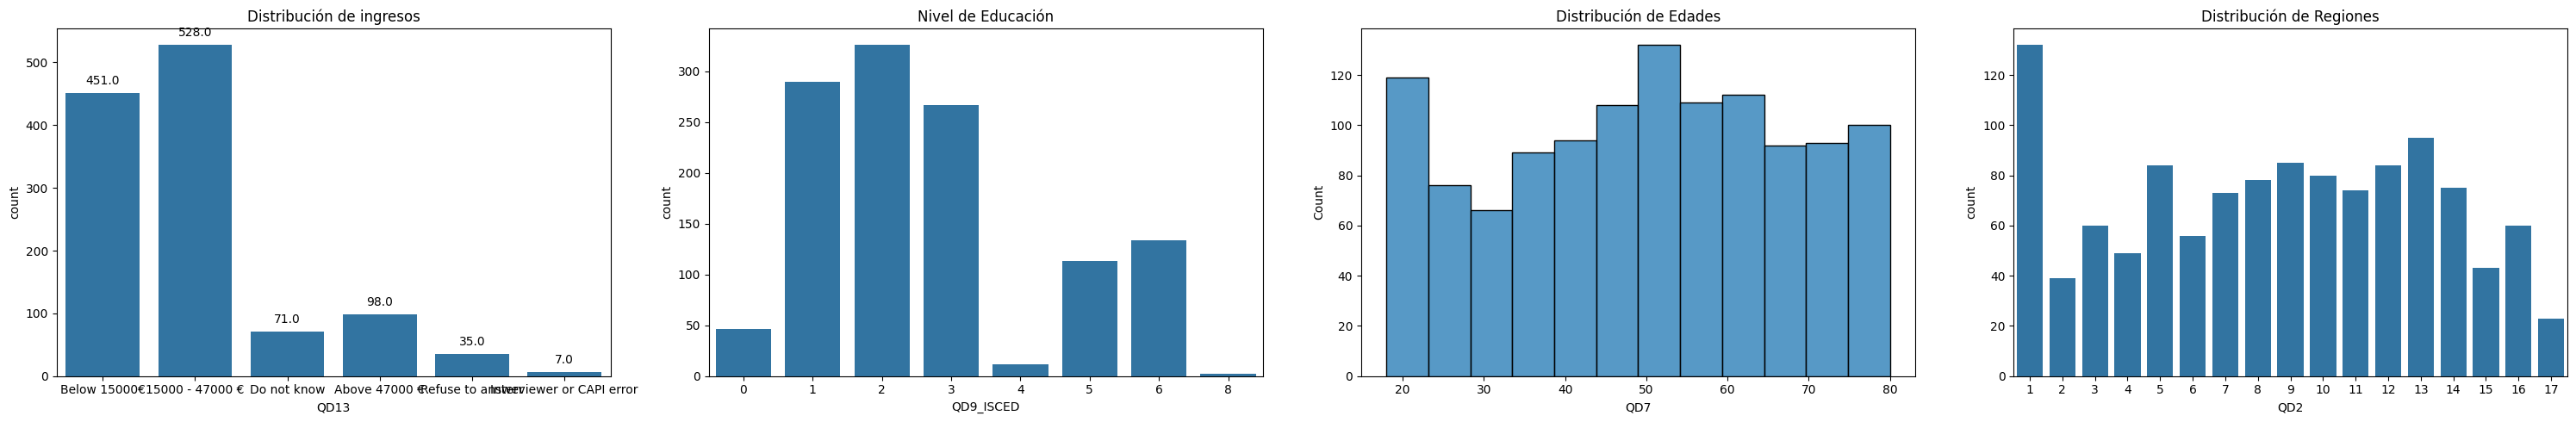

In [125]:
# FILTRAR DATASET POR RESPUESTAS A QK2 DISTINTAS DE 200 (respuesta incorrecta)
data_QK2 = data_2021[data_2021['QK2'] != 200]

# 
# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.countplot(x= 'QD13', data=data_QK2, ax=axes[0])
sns.countplot(x= 'QD9_ISCED', data=data_QK2, ax=axes[1])
sns.histplot(x= 'QD7', data=data_QK2, ax=axes[2])
sns.countplot(x= 'QD2', data=data_QK2, ax=axes[3])
axes[0].set_title('Distribución de ingresos')
axes[1].set_title('Nivel de Educación')
axes[2].set_title('Distribución de Edades')
axes[3].set_title('Distribución de Regiones')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()


#### nota financial knowledge

In [126]:
# Definir las respuestas correctas y las múltiples respuestas correctas donde sea necesario
respuestas_correctas = {
    'QK4': 0,  # Asumiendo que '0' es la respuesta correcta para QK4 (sin interés)
    'QK5': 102, # Asumiendo que '102' es la respuesta correcta para QK5 (100 principal + 2% de interés)
    'QK7_1': True,  # Asumiendo que True es la respuesta correcta para QK7_1
    'QK7_2': True,
    'QK7_3': True
}

# Respuestas múltiples para QK3
data_2021['QK3_puntos'] = data_2021['QK3'].apply(lambda x: 1 if x in [3, 4] else 0)

# Calcular puntos por cada respuesta correcta, excepto QK6
for pregunta, correcta in respuestas_correctas.items():
    data_2021[pregunta + '_puntos'] = (data_2021[pregunta] == correcta).astype(int)

# Asignar puntos para QK6 condicionado a QK5 siendo correcto también
data_2021['QK6_puntos'] = ((data_2021['QK6'] == 1) & (data_2021['QK5'] == 102)).astype(int)

# Sumar puntos para obtener la nota final de conocimiento financiero
columnas_puntos = [pregunta + '_puntos' for pregunta in respuestas_correctas] + ['QK3_puntos', 'QK6_puntos']
data_2021['Nota_Financial_Knowledge'] = data_2021[columnas_puntos].sum(axis=1)

# Visualizar el resultado
data_2021[['Nota_Financial_Knowledge'] + columnas_puntos].head()


,Nota_Financial_Knowledge,QK4_puntos,QK5_puntos,QK7_1_puntos,QK7_2_puntos,QK7_3_puntos,QK3_puntos,QK6_puntos
ID,,,,,,,,
1,5,1,1,1,1,1,0,0
2,6,1,1,0,1,1,1,1
3,5,1,1,1,1,1,0,0
4,5,1,1,1,1,1,0,0
5,5,1,1,1,0,1,0,1


/tmp/ipykernel_2649/3598526257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_2021, x='Nota_Financial_Knowledge', palette= 'viridis')


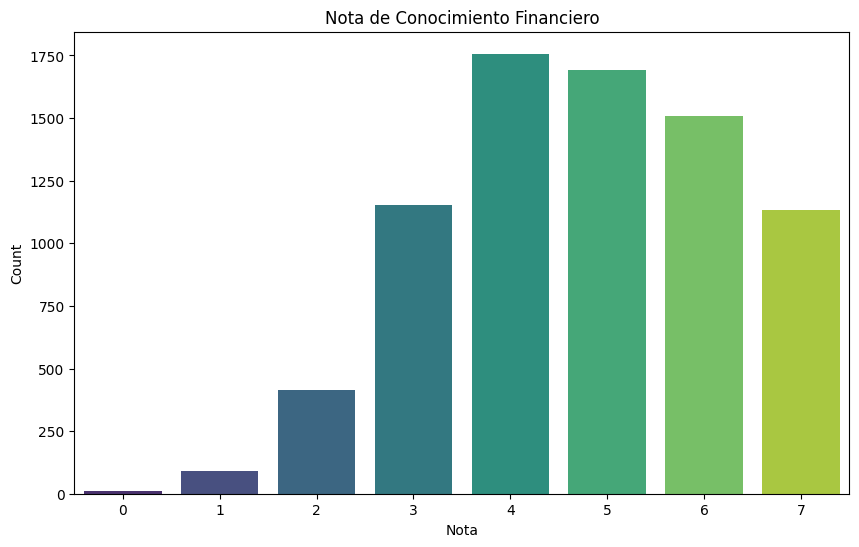

count    7764.000000
mean        4.748454
std         1.496861
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         7.000000
Name: Nota_Financial_Knowledge, dtype: float64


Nota_Financial_Knowledge
4    22.630088
5    21.780010
6    19.448738
3    14.863472
7    14.605873
2     5.358063
1     1.184956
0     0.128800
Name: proportion, dtype: float64

In [141]:
#barplot de la variable Nota_Financial_Knowledge
plt.figure(figsize=(10, 6))
sns.countplot(data = data_2021, x='Nota_Financial_Knowledge', palette= 'viridis')
plt.title('Nota de Conocimiento Financiero')
plt.xlabel('Nota')
plt.ylabel('Count')
plt.show()

print(data_2021['Nota_Financial_Knowledge'].describe())
data_2021['Nota_Financial_Knowledge'].value_counts(normalize=True) * 100

In [147]:

# INGRESOS
total_por_ingresos = data_2021['QD13'].value_counts()
high_knowledge = data_2021[data_2021['Nota_Financial_Knowledge'] > 5]['QD13'].value_counts()

proporcion_por_ingresos = (high_knowledge / total_por_ingresos) * 100

# EDUCACION
high_knowledge1 = data_2021[data_2021['Nota_Financial_Knowledge'] > 5]['QD9_ISCED'].value_counts()
 
proporcion_por_educacion = (high_knowledge1 / total_por_educacion) * 100

# REGION
total_por_region = data_2021['QD2'].value_counts()
high_knowledge2 = data_2021[data_2021['Nota_Financial_Knowledge'] > 5]['QD2'].value_counts()
 
proporcion_por_region = (high_knowledge2 / total_por_region) * 100

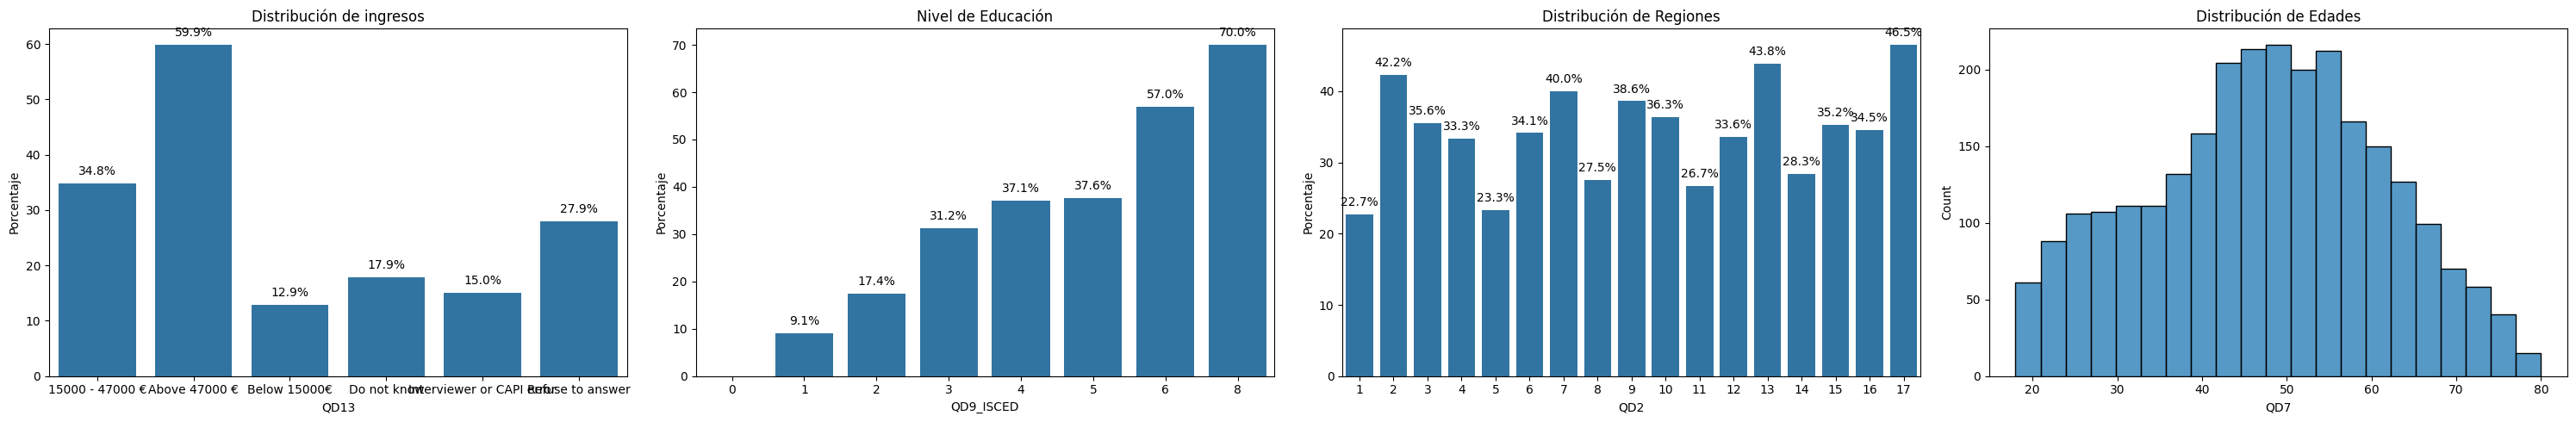

In [148]:
# FILTRAR DATASET POR Nota_Financial_Knowledge > 4
high_knowledge3 = data_2021[data_2021['Nota_Financial_Knowledge'] >5]


# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.barplot(x= proporcion_por_ingresos.index, y=proporcion_por_ingresos, ax=axes[0])
sns.barplot(x= proporcion_por_educacion.index, y=proporcion_por_educacion, ax=axes[1])
sns.histplot(x= 'QD7', data=high_knowledge3, ax=axes[3])
sns.barplot(x= proporcion_por_region.index, y=proporcion_por_region, ax=axes[2])
axes[0].set_title('Distribución de ingresos')
axes[0].set_ylabel('Porcentaje')
axes[1].set_title('Nivel de Educación')
axes[1].set_ylabel('Porcentaje')
axes[3].set_title('Distribución de Edades')
axes[2].set_title('Distribución de Regiones')
axes[2].set_ylabel('Porcentaje')

# Anotar los valores en los gráficos
for ax in axes[0:3]:  # Suponiendo que los primeros tres son gráficos de barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Ajustar el diseño de los gráficos y mostrarlos
plt.tight_layout()
plt.show()


In [149]:

# INGRESOS
total_por_ingresos = data_2021['QD13'].value_counts()
low_knowledge = data_2021[data_2021['Nota_Financial_Knowledge'] < 4]['QD13'].value_counts()

proporcion_por_ingresos = (low_knowledge / total_por_ingresos) * 100

# EDUCACION
low_knowledge1 = data_2021[data_2021['Nota_Financial_Knowledge'] < 4]['QD9_ISCED'].value_counts()
 
proporcion_por_educacion = (low_knowledge1 / total_por_educacion) * 100

# REGION
total_por_region = data_2021['QD2'].value_counts()
low_knowledge2 = data_2021[data_2021['Nota_Financial_Knowledge'] < 4]['QD2'].value_counts()
 
proporcion_por_region = (low_knowledge2 / total_por_region) * 100

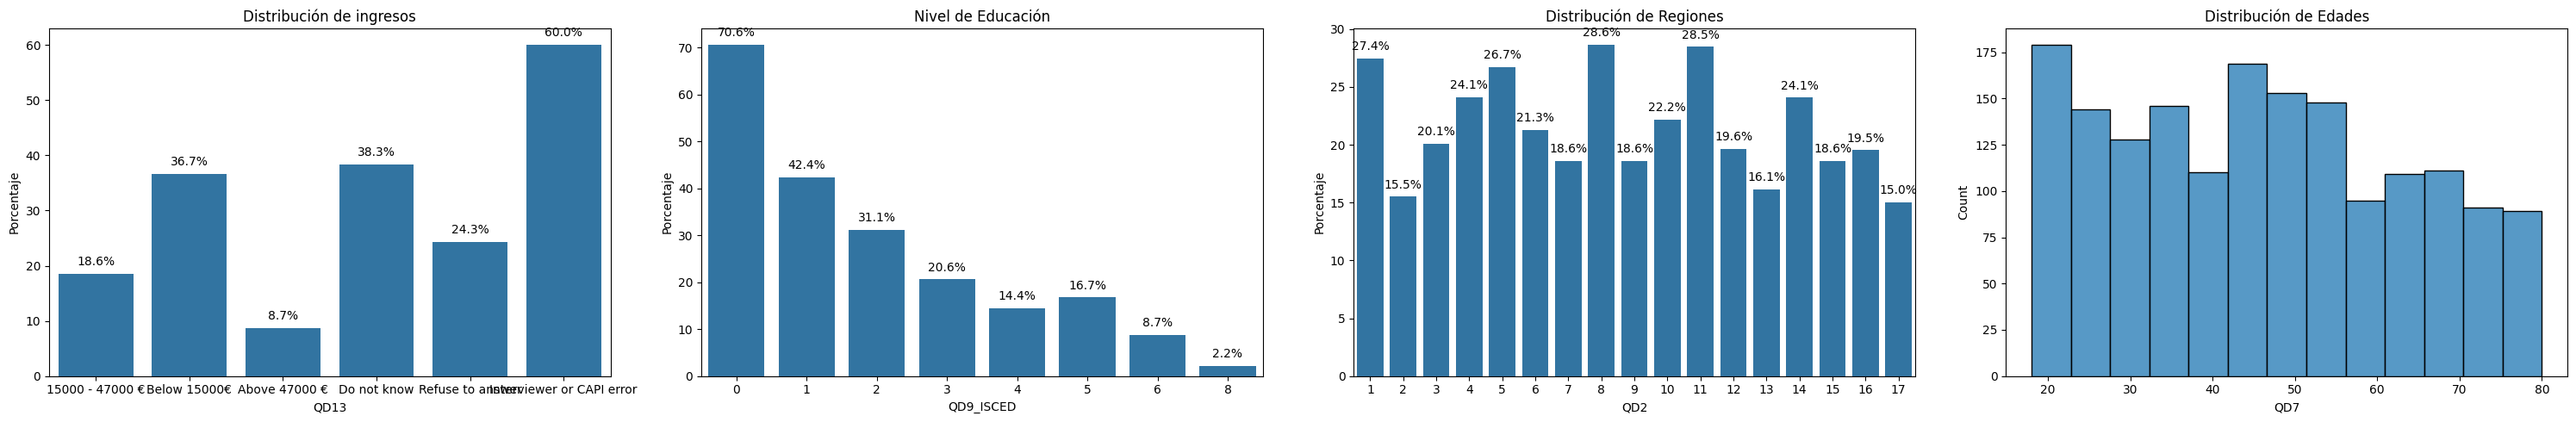

In [155]:
# FILTRAR DATASET POR Nota_Financial_Knowledge < 4
low_knowledge3 = data_2021[data_2021['Nota_Financial_Knowledge'] < 4]


# Análisis demográfico
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))
sns.barplot(x= proporcion_por_ingresos.index, y=proporcion_por_ingresos, ax=axes[0])
sns.barplot(x= proporcion_por_educacion.index, y=proporcion_por_educacion, ax=axes[1])
sns.histplot(x= 'QD7', data=low_knowledge3, ax=axes[3])
sns.barplot(x= proporcion_por_region.index, y=proporcion_por_region, ax=axes[2])
axes[0].set_title('Distribución de ingresos')
axes[0].set_ylabel('Porcentaje')
axes[1].set_title('Nivel de Educación')
axes[1].set_ylabel('Porcentaje')
axes[3].set_title('Distribución de Edades')
axes[2].set_title('Distribución de Regiones')
axes[2].set_ylabel('Porcentaje')

# Anotar los valores en los gráficos
for ax in axes[0:3]:  # Suponiendo que los primeros tres son gráficos de barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Ajustar el diseño de los gráficos y mostrarlos
plt.tight_layout()
plt.show()

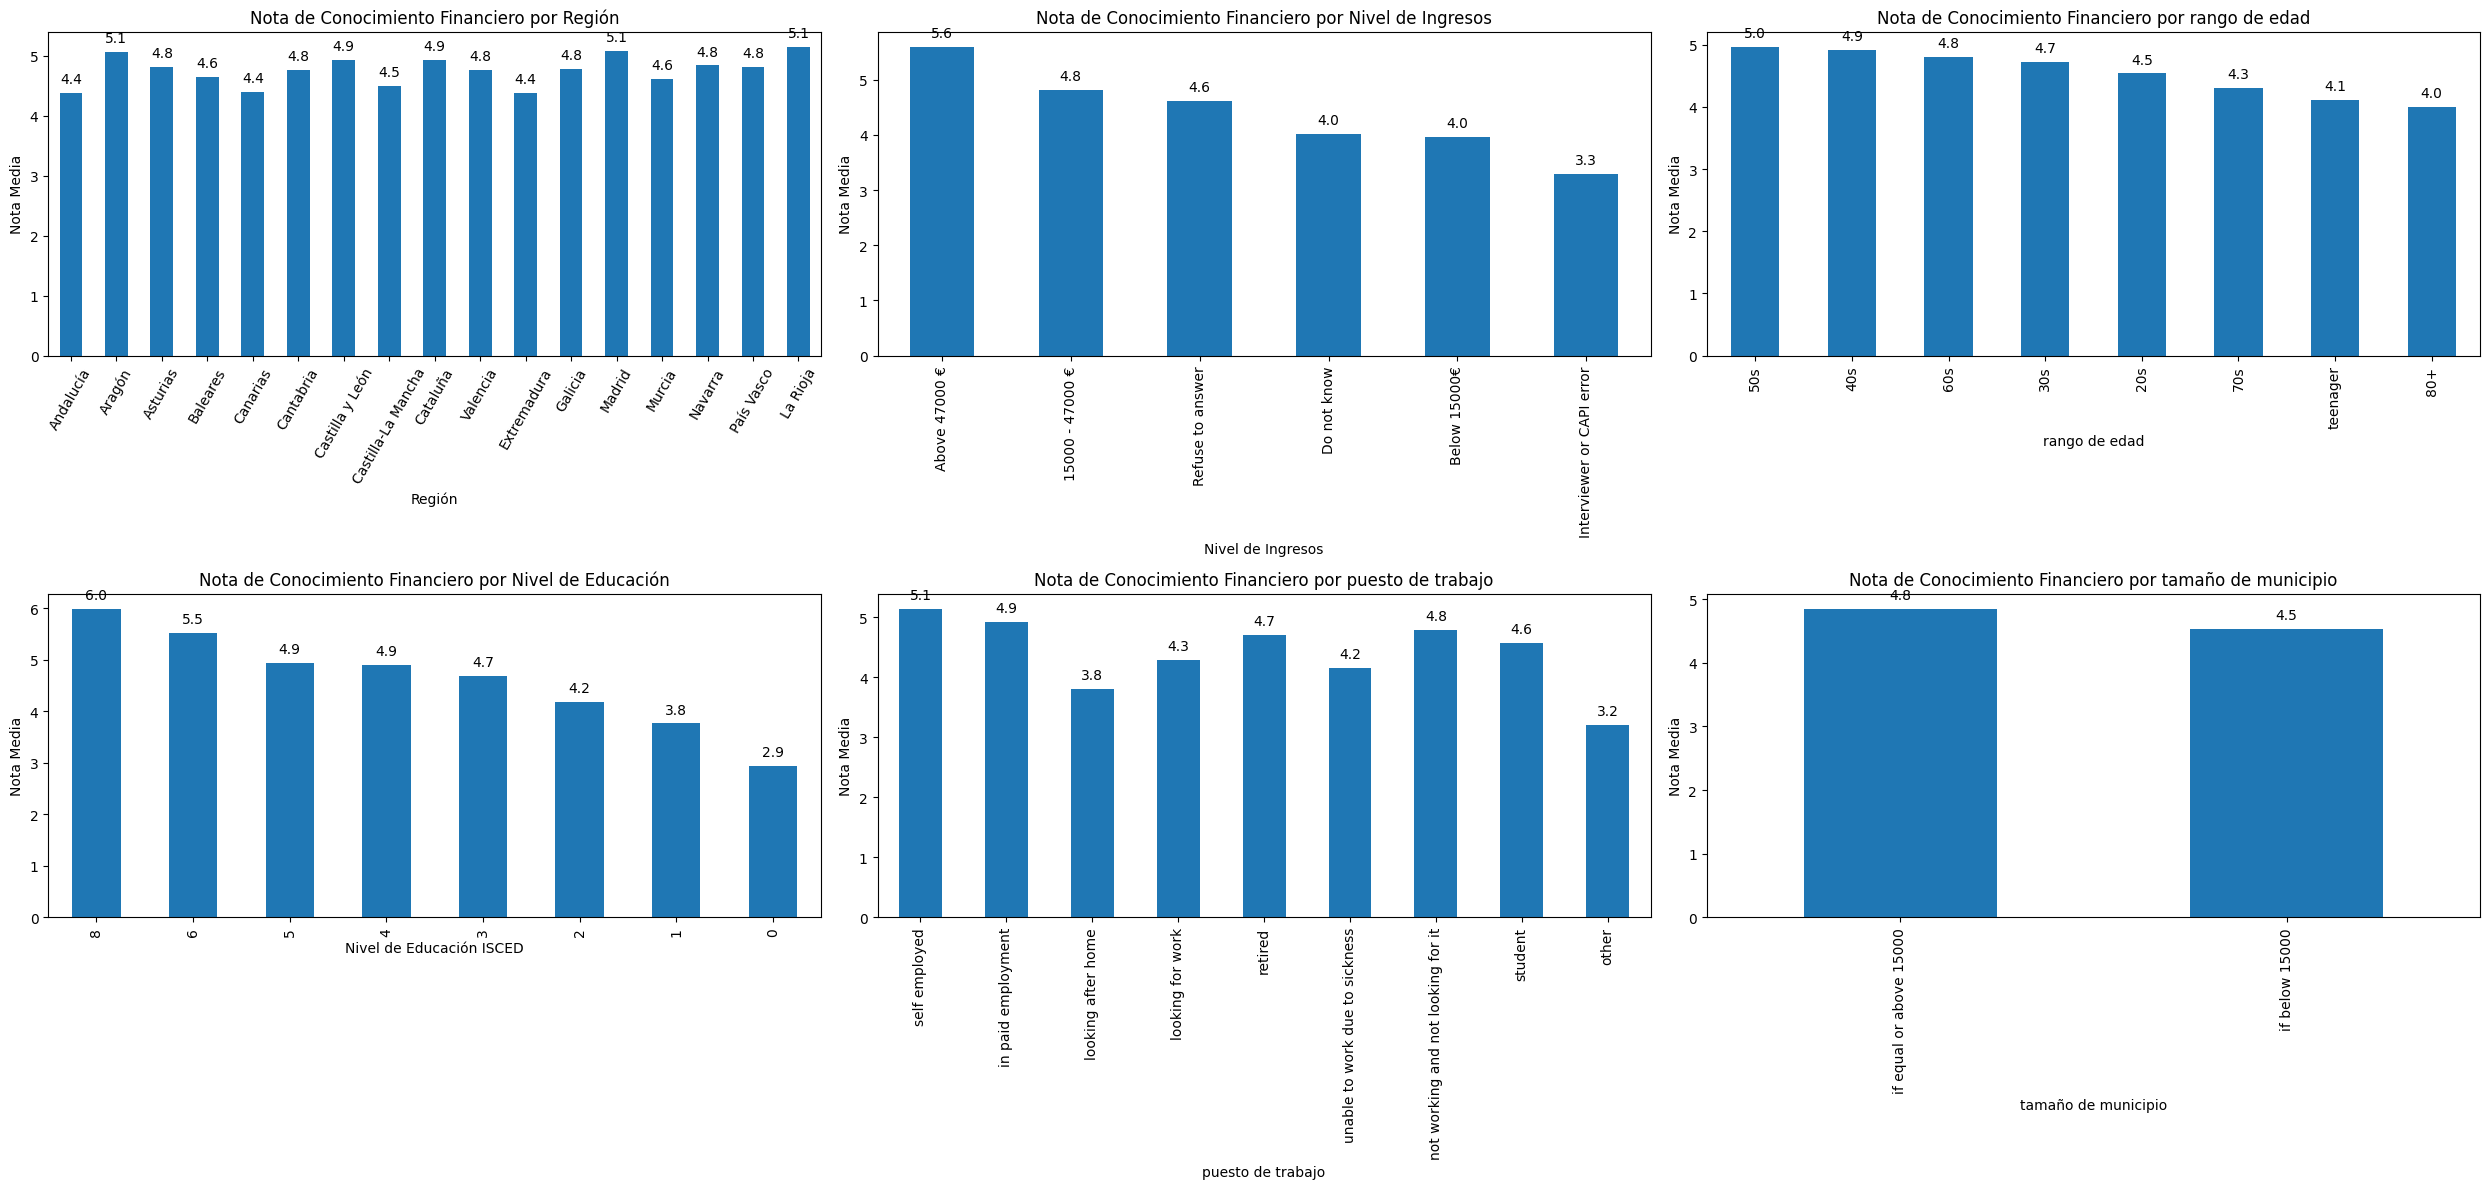

In [132]:
#media de nota_financial_knoledge agrupada por regiones, nivel de ingresos, nivel de educacion y edad
nota_por_region = data_2021.groupby('QD2')['Nota_Financial_Knowledge'].mean()

nota_por_ingresos = data_2021.groupby('QD13')['Nota_Financial_Knowledge'].mean().sort_values(ascending=False)

nota_por_educacion = data_2021.groupby('QD9_ISCED')['Nota_Financial_Knowledge'].mean().sort_values(ascending=False)

nota_por_puesto_trabajo = data_2021.groupby('QD10')['Nota_Financial_Knowledge'].mean()

nota_por_rango_edad = data_2021.groupby('QD7_a')['Nota_Financial_Knowledge'].mean().sort_values(ascending=False)

nota_por_municipio = data_2021.groupby('QD3')['Nota_Financial_Knowledge'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(2, 3, figsize=(25, 12))  # Cambia la disposición y el tamaño de la figura

# Gráfico 1: Nota de Conocimiento Financiero por Región
nota_por_region.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Nota de Conocimiento Financiero por Región')
axes[0,0].set_xlabel('Región')
axes[0,0].set_ylabel('Nota Media')
axes[0,0].set_xticklabels(['Andalucía', 'Aragón', 'Asturias', 'Baleares', 'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha', 'Cataluña', 'Valencia', 'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja'], rotation=60)

# Gráfico 2: Nota de Conocimiento Financiero por Nivel de Ingresos
nota_por_ingresos.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Nota de Conocimiento Financiero por Nivel de Ingresos')
axes[0,1].set_xlabel('Nivel de Ingresos')
axes[0,1].set_ylabel('Nota Media')

#grafico 3: Nota de Conocimiento Financiero por rango de edad
nota_por_rango_edad.plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Nota de Conocimiento Financiero por rango de edad')
axes[0,2].set_xlabel('rango de edad')
axes[0,2].set_ylabel('Nota Media')

# Gráfico 4: Nota de Conocimiento Financiero por Nivel de Educación
nota_por_educacion.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Nota de Conocimiento Financiero por Nivel de Educación')
axes[1,0].set_xlabel('Nivel de Educación ISCED')
axes[1,0].set_ylabel('Nota Media')

# Gráfico 5: Nota de Conocimiento Financiero por Tamaño de Municipio
nota_por_puesto_trabajo.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Nota de Conocimiento Financiero por puesto de trabajo')
axes[1,1].set_xlabel('puesto de trabajo')
axes[1,1].set_ylabel('Nota Media')
axes[1,1].set_xticklabels(['self employed', 'in paid employment', 'looking after home', 'looking for work', 'retired', 'unable to work due to sickness', 'not working and not looking for it', 'student', 'other'])

# Grafico 6: Nota de Conocimiento Financiero por tamaño de municipio 
nota_por_municipio.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Nota de Conocimiento Financiero por tamaño de municipio')
axes[1,2].set_xlabel('tamaño de municipio')
axes[1,2].set_ylabel('Nota Media')

# Añadir anotaciones a todos los ejes
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  # Ajustar automáticamente los parámetros de la subtrama para dar espacio al contenido
plt.tight_layout()
plt.show()


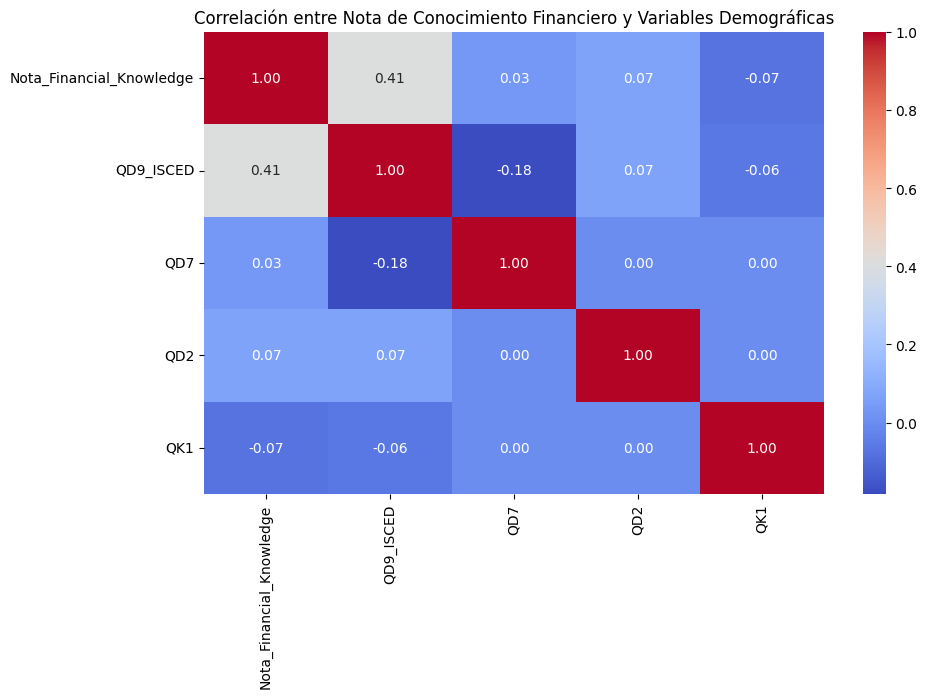

In [133]:
#ver correlacion entre nota_financial_knowledge y las variables demograficas
correlacion = data_2021[['Nota_Financial_Knowledge', 'QD9_ISCED', 'QD7', 'QD2', 'QK1']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Nota de Conocimiento Financiero y Variables Demográficas')
plt.show()


In [134]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data_numeric = data_encoded_2021.select_dtypes(include=['int', 'float'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)  # Escalar los datos numéricos

# Aplicar PCA
pca = PCA(n_components=0.95)  # Conservar el 95% de la varianza
data_reduced = pca.fit_transform(data_scaled)

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_reduced)

# Añadir los clusters al dataframe original
data_encoded_2021['Cluster'] = clusters


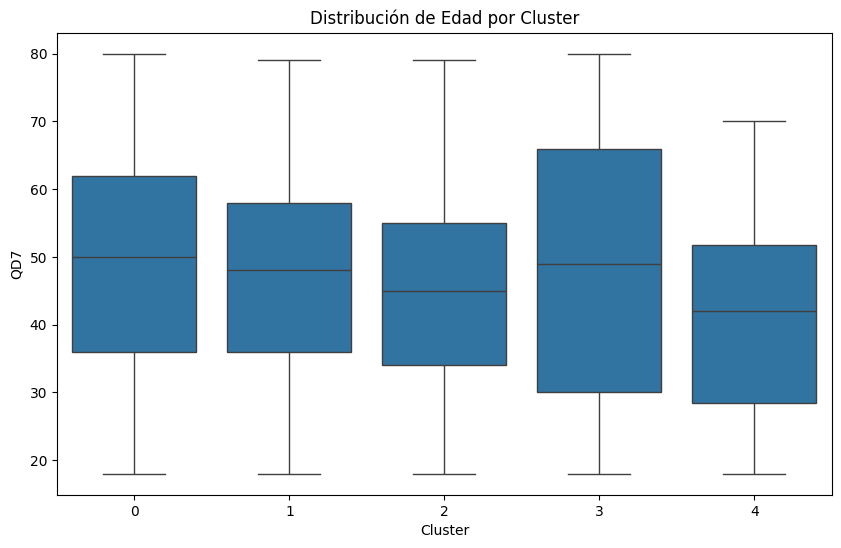

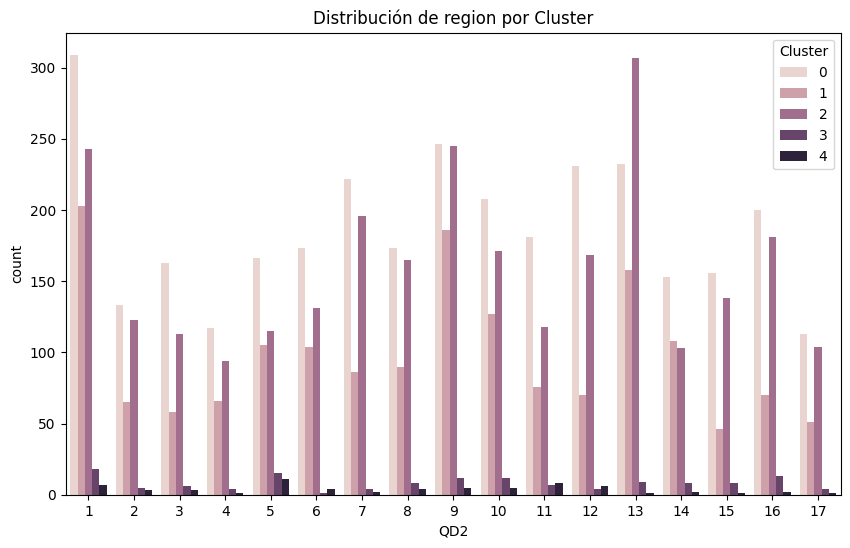

In [135]:
# Comparar edad entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='QD7', data=data_encoded_2021)
plt.title('Distribución de Edad por Cluster')
plt.show()

# Comparar ingresos entre clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='QD2', hue='Cluster', data=data_encoded_2021)
plt.title('Distribución de region por Cluster')
plt.show()


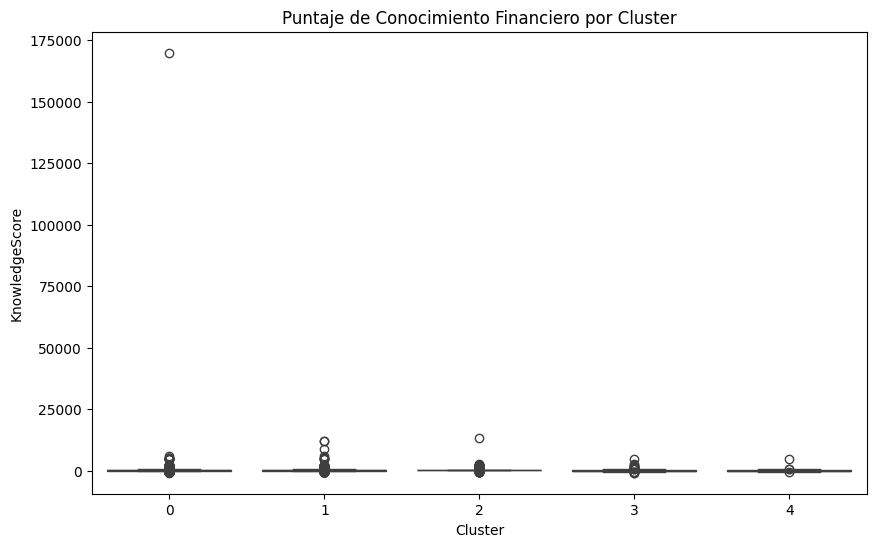

NameError: name 'threshold' is not defined

In [136]:
# Ejemplo para ver el nivel de conocimientos financieros en cada cluster
knowledge_columns = ['QK2', 'QK3', 'QK4', 'QK5', 'QK6', 'QK7_1', 'QK7_2', 'QK7_3']
knowledge_scores = data_encoded_2021[knowledge_columns].sum(axis=1)
data_encoded_2021['KnowledgeScore'] = knowledge_scores

# Comparar el puntaje de conocimiento financiero entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='KnowledgeScore', data=data_encoded_2021)
plt.title('Puntaje de Conocimiento Financiero por Cluster')
plt.show()

# Identificar clusters con bajo puntaje de conocimiento
low_knowledge_clusters = data_encoded_2021[data_encoded_2021['KnowledgeScore'] < threshold]['Cluster'].value_counts()
print("Clusters con bajo puntaje de conocimiento financiero:", low_knowledge_clusters)
